In [18]:
#!pip install yfinance
#!pip install mplfinance

import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yfinance import download
from datetime import datetime
from pandas.plotting import lag_plot
from mplfinance.original_flavor import candlestick_ohlc
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.api import OLS, add_constant
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import datetime as dt
import os

In [19]:
# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

# Create directory if it doesn't exist
os.makedirs(dataset_dir, exist_ok=True)

# Define the date range
start_date = '2024-01-01'
end_date = '2024-12-31'

def fetch_and_save_stock_data(ticker):
    """
    Fetches stock data and saves it with the required column names
    """
    # Download data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Reset index to get Date as a column
    data = data.reset_index()
    
    # Rename 'Date' to 'Price' for consistency with existing files
    data = data.rename(columns={'Date': 'Price'})
    
    # Reorder columns
    data = data[['Price', 'Close', 'High', 'Low', 'Open', 'Volume']]
    
    # Save in raw format
    filepath = os.path.join(dataset_dir, f"{ticker.replace('^', '').replace('=', '_')}_data.csv")
    data.to_csv(filepath, index=False)
    return data


In [20]:
def clean_dataset(filepath):
    """
    Cleans a dataset to ensure proper format:
    - Rename Price to Date
    - Remove empty rows and row 2
    - Ensure proper data types
    """
    # Load the dataset
    df = pd.read_csv(filepath)
    
    # Rename 'Price' column to 'Date'
    if 'Price' in df.columns:
        df = df.rename(columns={'Price': 'Date'})
    
    # Remove row 2 and any empty rows
    df = df.dropna(how='all')  # Remove completely empty rows
    if len(df) > 2:  # Make sure we have enough rows
        df = pd.concat([df.iloc[:1], df.iloc[2:]]).reset_index(drop=True)
    
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert numeric columns to appropriate types
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Drop any rows with NaN values after conversion
    df = df.dropna()
    
    # Ensure correct column order
    df = df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume']]
    
    return df

# Define tickers
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG', '^GSPC', 'BTC-USD', 'GC=F']

# Step 1: Fetch and save all data
print("Step 1: Fetching and saving raw data...")
raw_data = {}
for ticker in tickers:
    print(f"Fetching data for {ticker}")
    try:
        raw_data[ticker] = fetch_and_save_stock_data(ticker)
        print(f"Successfully saved raw data for {ticker}")
    except Exception as e:
        print(f"Error fetching {ticker}: {str(e)}")

# Step 2: Clean all datasets
print("\nStep 2: Cleaning and saving processed data...")
cleaned_data = {}
for ticker in tickers:
    try:
        input_path = os.path.join(dataset_dir, f"{ticker.replace('^', '').replace('=', '_')}_data.csv")
        print(f"Cleaning data for {ticker}")
        
        # Clean the dataset
        cleaned_data[ticker] = clean_dataset(input_path)
        
        # Save cleaned data
        output_path = os.path.join(dataset_dir, f"{ticker.replace('^', '').replace('=', '_')}_cleaned.csv")
        cleaned_data[ticker].to_csv(output_path, index=False)
        
        # Verify the output
        print(f"Successfully cleaned and saved data for {ticker}")
        print(f"Number of rows: {len(cleaned_data[ticker])}")
        print("First few rows:")
        print(cleaned_data[ticker].head(3))
        print("\n")
    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Step 1: Fetching and saving raw data...
Fetching data for META
Successfully saved raw data for META
Fetching data for AAPL
Successfully saved raw data for AAPL
Fetching data for AMZN
Successfully saved raw data for AMZN
Fetching data for NFLX
Successfully saved raw data for NFLX
Fetching data for GOOG
Successfully saved raw data for GOOG
Fetching data for ^GSPC
Successfully saved raw data for ^GSPC
Fetching data for BTC-USD



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully saved raw data for BTC-USD
Fetching data for GC=F
Successfully saved raw data for GC=F

Step 2: Cleaning and saving processed data...
Cleaning data for META
Successfully cleaned and saved data for META
Number of rows: 250
First few rows:
        Date       Close        High         Low        Open      Volume
1 2024-01-03  343.159149  346.625917  341.874050  343.667218  15451100.0
2 2024-01-04  345.799042  346.825121  342.093197  343.189017  12099900.0
3 2024-01-05  350.610687  352.154777  344.942338  345.669540  13920700.0


Cleaning data for AAPL
Successfully cleaned and saved data for AAPL
Number of rows: 250
First few rows:
        Date       Close        High         Low        Open      Volume
1 2024-01-03  183.351746  184.973804  182.535736  183.321893  58414500.0
2 2024-01-04  181.023163  182.197403  179.998185  181.261983  71983600.0
3 2024-01-05  180.296707  181.869006  179.291637  181.102771  62303300.0


Cleaning data for AMZN
Successfully cleaned and saved dat

Inflation data saved to: C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis\Inflation.csv


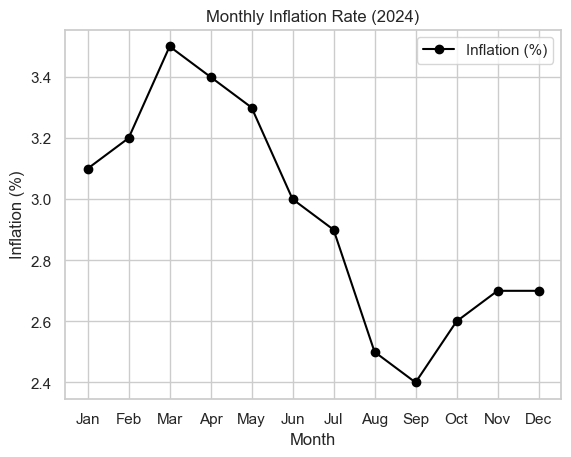

In [21]:
# Define the data for 2024
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
inflation_rates = [3.1, 3.2, 3.5, 3.4, 3.3, 3.0, 2.9, 2.5, 2.4, 2.6, 2.7, 2.7]

# Define the directory for saving the file
directory = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"


# Create a DataFrame for inflation data
inflation_data = pd.DataFrame({
    "Month": months,
    "Inflation": inflation_rates
})

# Save the DataFrame to a CSV file
output_file = os.path.join(directory, "Inflation.csv")
inflation_data.to_csv(output_file, index=False)

print(f"Inflation data saved to: {output_file}")

# Plot the data
plt.plot(months, inflation_rates, marker='o', linestyle='-', label="Inflation (%)", color='black')
plt.title("Monthly Inflation Rate (2024)")
plt.xlabel("Month")
plt.ylabel("Inflation (%)")
plt.grid(True)
plt.legend()
plt.show()

In [22]:
# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

# Function to load cleaned data
def load_cleaned_data(ticker):
    """Load cleaned data from CSV and set Date as index"""
    file_path = os.path.join(dataset_dir, f"{ticker.replace('^', '').replace('=', '_')}_cleaned.csv")
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# Define grouping function
def group_stocks(stock_dict):
    """Group stocks by their Close prices"""
    return pd.concat({key: stock["Close"] for key, stock in stock_dict.items()}, axis=1)

# Load all cleaned data
meta = load_cleaned_data('META')
aapl = load_cleaned_data('AAPL')
amzn = load_cleaned_data('AMZN')
nflx = load_cleaned_data('NFLX')
goog = load_cleaned_data('GOOG')
sp500 = load_cleaned_data('GSPC')
bitcoin = load_cleaned_data('BTC-USD')
gold = load_cleaned_data('GC=F')

# Create FAANG portfolio
faang = group_stocks({
    'Facebook': meta,
    'Apple': aapl,
    'Amazon': amzn,
    'Netflix': nflx,
    'Google': goog
})

# Create FAANG + Gold portfolio
faang_gold = group_stocks({
    'Facebook': meta,
    'Apple': aapl,
    'Amazon': amzn,
    'Netflix': nflx,
    'Google': goog,
    'Gold': gold
})

# Create All Assets portfolio
all_assets = group_stocks({
    'Bitcoin': bitcoin,
    'S&P 500': sp500,
    'Facebook': meta,
    'Apple': aapl,
    'Amazon': amzn,
    'Netflix': nflx,
    'Google': goog
})

# Print information about each portfolio
print("\nFAANG Portfolio Shape:", faang.shape)
print("First few rows of FAANG portfolio:")
print(faang.head())

print("\nFAANG + Gold Portfolio Shape:", faang_gold.shape)
print("First few rows of FAANG + Gold portfolio:")
print(faang_gold.head())

print("\nAll Assets Portfolio Shape:", all_assets.shape)
print("First few rows of All Assets portfolio:")
print(all_assets.head())


FAANG Portfolio Shape: (250, 5)
First few rows of FAANG portfolio:
              Facebook       Apple      Amazon     Netflix      Google
Date                                                                  
2024-01-03  343.159149  183.351746  148.470001  470.260010  139.857483
2024-01-04  345.799042  181.023163  144.570007  474.670013  137.545776
2024-01-05  350.610687  180.296707  145.240005  474.059998  136.898117
2024-01-08  357.295166  184.655365  149.100006  485.029999  140.026871
2024-01-09  356.069824  184.237411  151.369995  482.089996  142.049606

FAANG + Gold Portfolio Shape: (250, 6)
First few rows of FAANG + Gold portfolio:
              Facebook       Apple      Amazon     Netflix      Google  \
Date                                                                     
2024-01-03  343.159149  183.351746  148.470001  470.260010  139.857483   
2024-01-04  345.799042  181.023163  144.570007  474.670013  137.545776   
2024-01-05  350.610687  180.296707  145.240005  474.05999

In [23]:
# Define file names and colors for all datasets
file_names_color = {
    "Amazon": ("AMZN_cleaned.csv", "#FF9900"),    # Amazon orange
    "Apple": ("AAPL_cleaned.csv", "#A2AAAD"),     # Apple silver
    "Bitcoin": ("BTC-USD_cleaned.csv", "#00FF00"), # Bitcoin green
    "Facebook": ("META_cleaned.csv", "#0668E1"),   # Meta blue
    "Google": ("GOOG_cleaned.csv", "#4285F4"),     # Google blue
    "Netflix": ("NFLX_cleaned.csv", "#E50914"),    # Netflix red
    "S&P 500": ("GSPC_cleaned.csv", "#0033A0"),    # Dark blue
    "Gold": ("GC_F_cleaned.csv", "#FFD700")        # Gold
}

In [24]:
# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

# Define file names
file_names = {
    "Amazon": "AMZN_cleaned.csv",
    "Apple": "AAPL_cleaned.csv",
    "Bitcoin": "BTC-USD_cleaned.csv",
    "Facebook": "META_cleaned.csv",
    "Google": "GOOG_cleaned.csv",
    "Netflix": "NFLX_cleaned.csv",
    "S&P 500": "GSPC_cleaned.csv",
    "Gold": "GC_F_cleaned.csv"
}

def process_data(file_path):
    """
    Process each dataset and compute summary statistics
    """
    try:
        # Read data
        df = pd.read_csv(file_path)

        # Convert Date to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Compute summary statistics for the Close column
        stats = df['Close'].describe()

        # Round statistics to 2 decimal places
        stats = stats.round(2)

        return stats

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Process all datasets
print("Processing datasets...")
all_assets = {}

for name, file_name in file_names.items():
    file_path = os.path.join(dataset_dir, file_name)
    print(f"Processing {name}...")
    stats = process_data(file_path)
    if stats is not None:
        all_assets[name] = stats

# Create a DataFrame to consolidate the statistics
if all_assets:
    summary_df = pd.DataFrame(all_assets)

    # Create the final summary DataFrame with proper column names
    final_summary = pd.DataFrame({
        'Count': summary_df.loc['count'],
        'Mean': summary_df.loc['mean'],
        'Std Dev': summary_df.loc['std'],
        'Minimum': summary_df.loc['min'],
        '25th Percentile': summary_df.loc['25%'],
        'Median': summary_df.loc['50%'],
        '75th Percentile': summary_df.loc['75%'],
        'Maximum': summary_df.loc['max']
    })

    # Display results
    print("\nSummary Statistics for All Assets:")
    print("=" * 80)
    print(final_summary.T)

    # Print key insights
    print("\nKey Insights:")
    print("-" * 80)
    print(f"Highest average price: {final_summary['Mean'].idxmax()} (${final_summary['Mean'].max():,.2f})")
    print(f"Lowest average price: {final_summary['Mean'].idxmin()} (${final_summary['Mean'].min():,.2f})")
    print(f"Most volatile asset (highest std dev): {final_summary['Std Dev'].idxmax()}")
    print(f"Most stable asset (lowest std dev): {final_summary['Std Dev'].idxmin()}")

    # Additional insights
    print("\nVolatility Analysis:")
    print("-" * 80)
    for asset in final_summary.index:
        mean = final_summary.loc[asset, 'Mean']
        std = final_summary.loc[asset, 'Std Dev']
        cv = std / mean  # Coefficient of Variation
        print(f"{asset}: CV = {cv:.4f} (Std Dev / Mean)")
else:
    print("No data processed.")


Processing datasets...
Processing Amazon...
Processing Apple...
Processing Bitcoin...
Processing Facebook...
Processing Google...
Processing Netflix...
Processing S&P 500...
Processing Gold...

Summary Statistics for All Assets:
                 Amazon   Apple    Bitcoin  Facebook  Google  Netflix  \
Count            250.00  250.00     364.00    250.00  250.00   250.00   
Mean             184.63  206.68   65948.54    508.62  164.88   671.43   
Std Dev           17.22   25.63   14607.73     61.67   15.45   109.05   
Minimum          144.57  164.41   39507.37    343.16  132.09   470.26   
25th Percentile  175.39  183.39   59091.27    474.89  153.13   609.46   
Median           183.43  213.78   64148.89    503.85  166.07   647.84   
75th Percentile  189.65  227.10   69126.51    562.82  176.15   706.88   
Maximum          232.93  259.02  106140.60    632.17  198.16   936.56   

                 S&P 500     Gold  
Count             250.00   250.00  
Mean             5429.16  2390.35  
Std D

In [25]:
# Re-define the summary statistics matrix as a DataFrame
data = {
    "Amazon": [250.0, 184.63, 17.22, 144.57, 175.39, 183.43, 189.65, 232.93],
    "Apple": [250.0, 206.68, 25.63, 164.41, 183.39, 213.78, 227.10, 259.02],
    "Bitcoin": [364.0, 65948.54, 14607.73, 39507.37, 59091.27, 64148.89, 69126.51, 106140.60],
    "Facebook": [250.0, 508.62, 61.67, 343.16, 474.89, 503.85, 562.82, 632.17],
    "Google": [250.0, 164.88, 15.45, 132.09, 153.13, 166.07, 176.15, 198.16],
    "Netflix": [250.0, 671.43, 109.05, 470.26, 609.46, 647.84, 706.88, 936.56],
    "S&P 500": [250.0, 5429.16, 365.86, 4688.68, 5139.61, 5435.44, 5717.34, 6090.27],
    "Gold": [250.0, 2390.35, 223.28, 1990.30, 2289.45, 2385.40, 2609.48, 2788.50],
}

index = [
    "Count",
    "Mean",
    "Std Dev",
    "Minimum",
    "25th Percentile",
    "Median",
    "75th Percentile",
    "Maximum",
]

df = pd.DataFrame(data, index=index)

df 


Amazon   Apple    Bitcoin  Facebook  Google  Netflix  \
Count            250.00  250.00     364.00    250.00  250.00   250.00   
Mean             184.63  206.68   65948.54    508.62  164.88   671.43   
Std Dev           17.22   25.63   14607.73     61.67   15.45   109.05   
Minimum          144.57  164.41   39507.37    343.16  132.09   470.26   
25th Percentile  175.39  183.39   59091.27    474.89  153.13   609.46   
Median           183.43  213.78   64148.89    503.85  166.07   647.84   
75th Percentile  189.65  227.10   69126.51    562.82  176.15   706.88   
Maximum          232.93  259.02  106140.60    632.17  198.16   936.56   

                 S&P 500     Gold  
Count             250.00   250.00  
Mean             5429.16  2390.35  
Std Dev           365.86   223.28  
Minimum          4688.68  1990.30  
25th Percentile  5139.61  2289.45  
Median           5435.44  2385.40  
75th Percentile  5717.34  2609.48  
Maximum          6090.27  2788.50

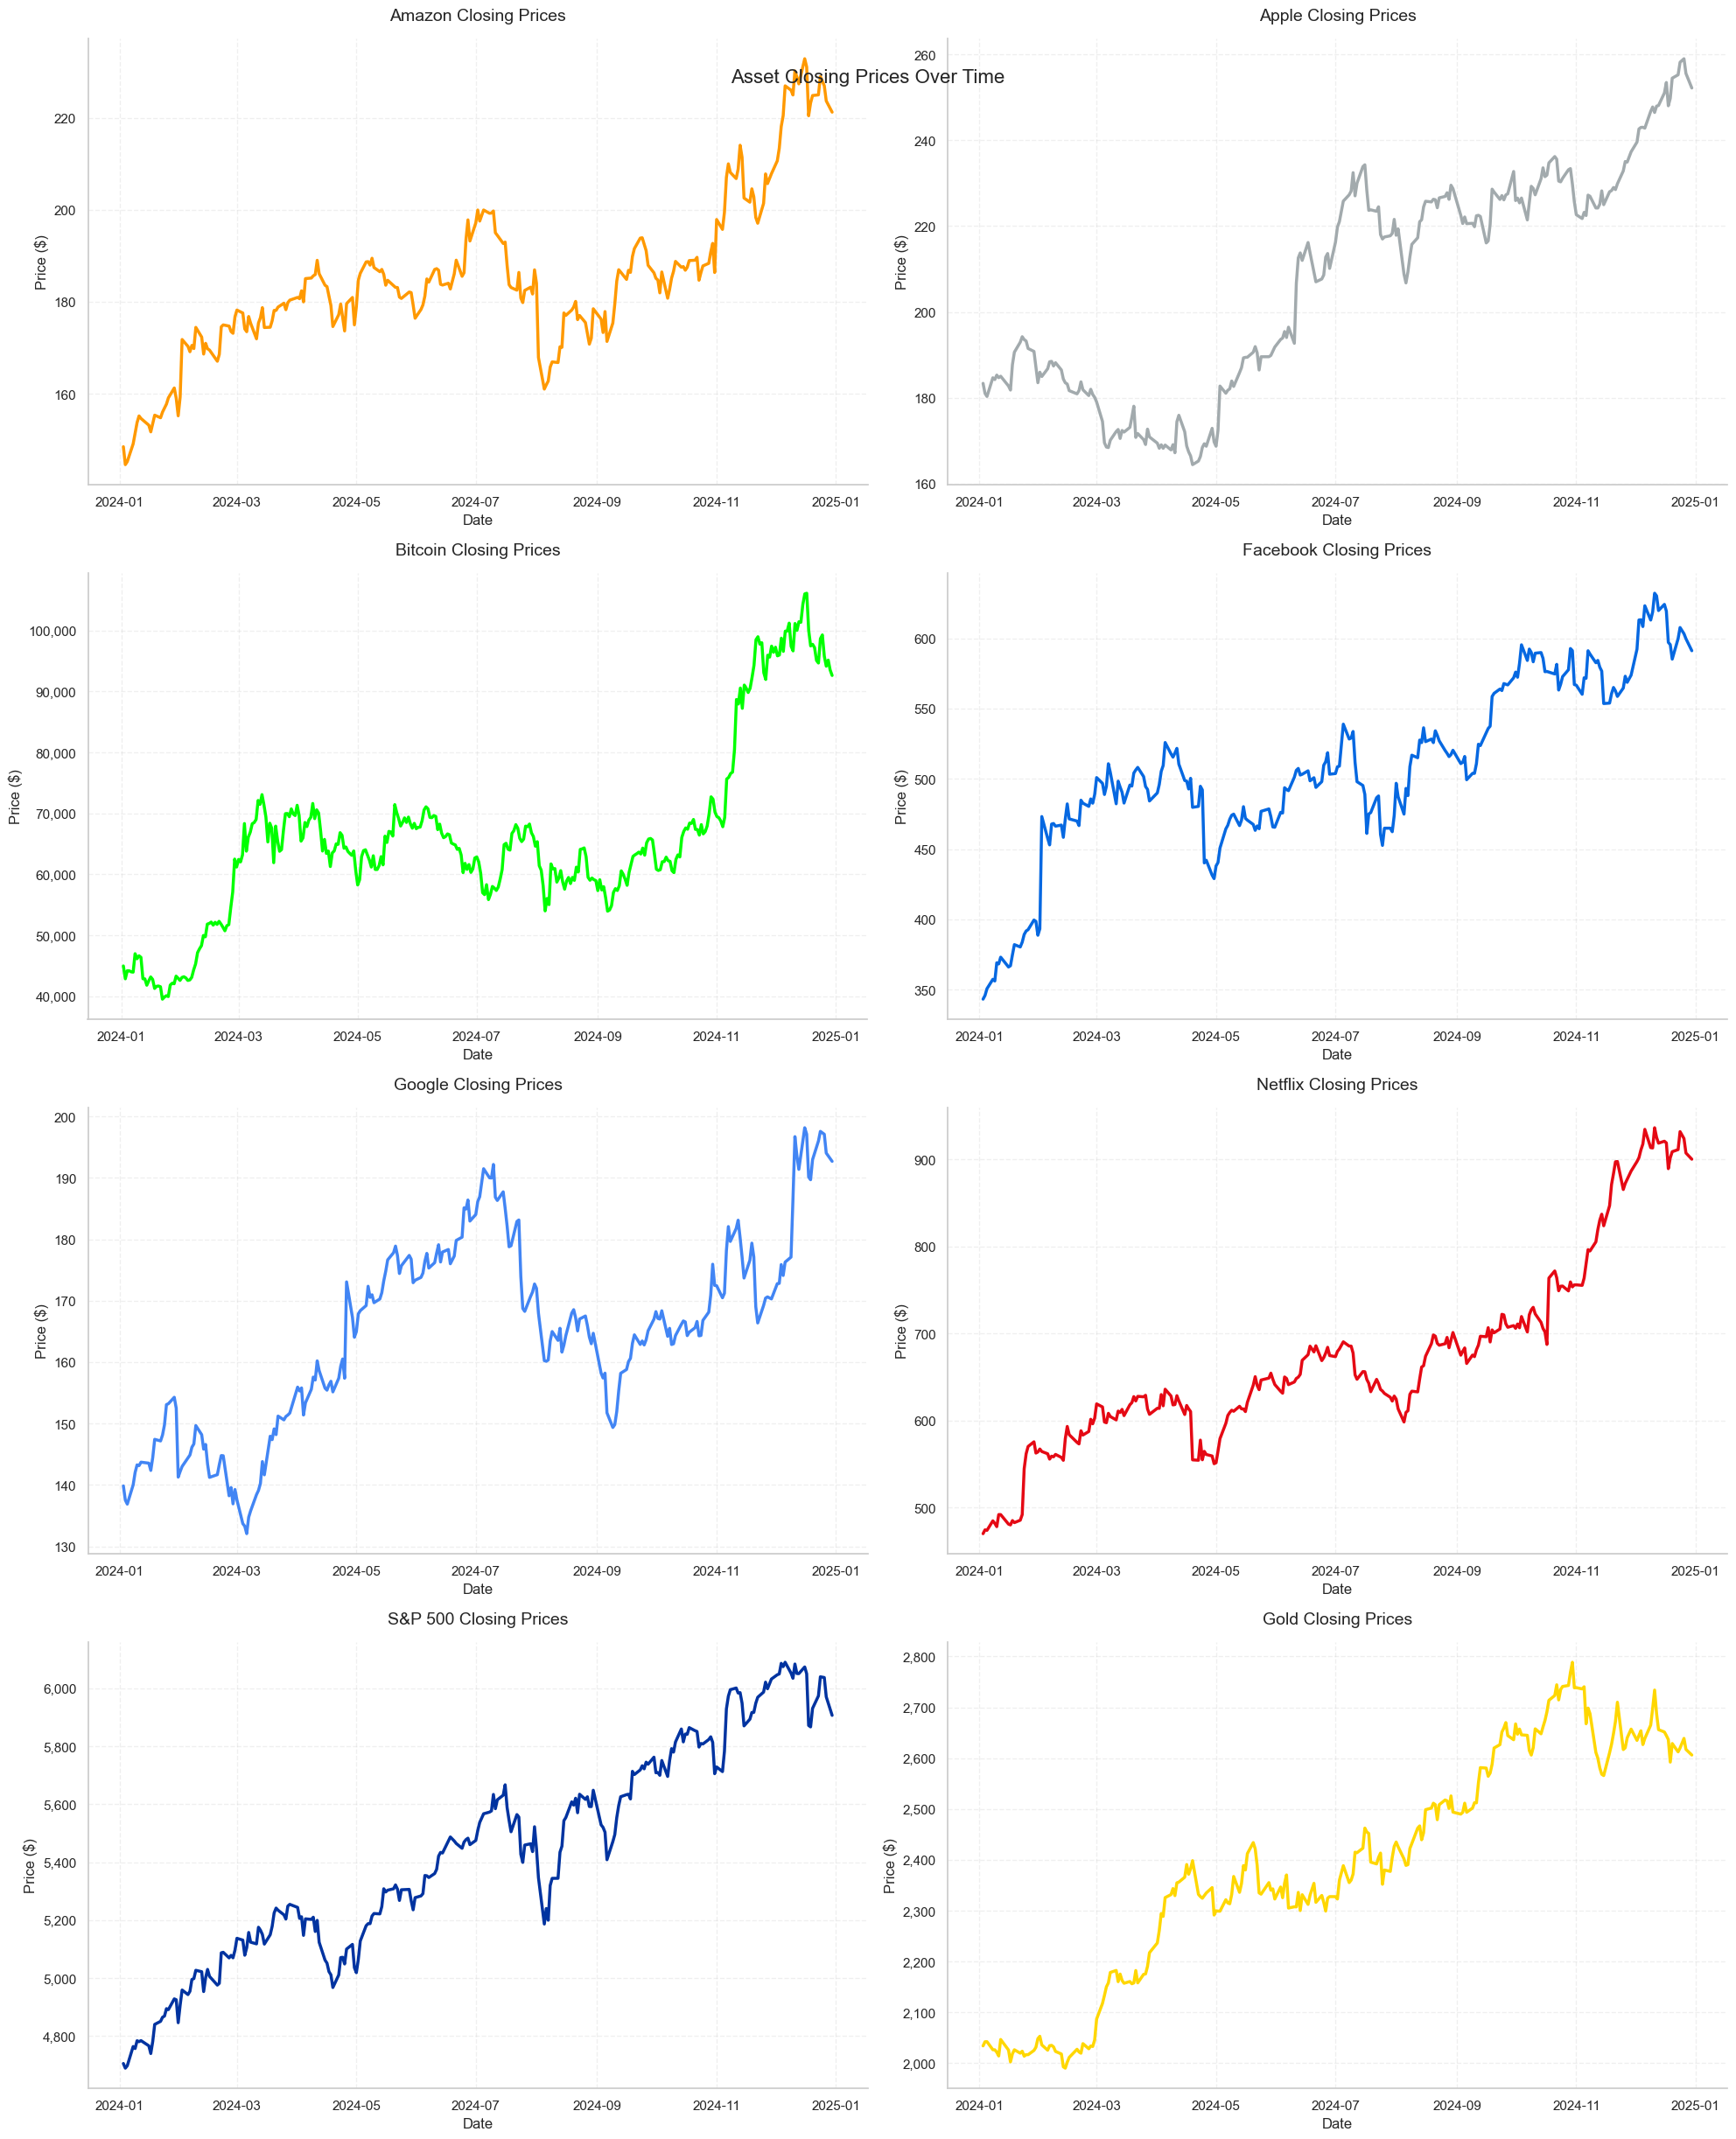

In [26]:
# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

'''# Define file names and colors for all datasets
file_names_color = {
    "Amazon": ("AMZN_cleaned.csv", "#FF9900"),    # Amazon orange
    "Apple": ("AAPL_cleaned.csv", "#A2AAAD"),     # Apple silver
    "Bitcoin": ("BTC-USD_cleaned.csv", "#00FF00"), # Bitcoin green
    "Facebook": ("META_cleaned.csv", "#0668E1"),   # Meta blue
    "Google": ("GOOG_cleaned.csv", "#4285F4"),     # Google blue
    "Netflix": ("NFLX_cleaned.csv", "#E50914"),    # Netflix red
    "S&P 500": ("GSPC_cleaned.csv", "#0033A0"),    # Dark blue
    "Gold": ("GC_F_cleaned.csv", "#FFD700")        # Gold
}'''

# Create subplots for each dataset
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(4, 2, figsize=(20, 25))
fig.suptitle('Asset Closing Prices Over Time', fontsize=16, y=0.95)

# Flatten axs for easier iteration
axs_flat = axs.flatten() # transforms a 2D array of subplot objects into a 1D array

# Plot each dataset 
for idx, (name, (file_name, color)) in enumerate(file_names_color.items()):
    # Read data
    file_path = os.path.join(dataset_dir, file_name)
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Create plot with seaborn
    sns.lineplot(data=df, x='Date', y='Close', color=color, ax=axs_flat[idx], 
                linewidth=2.5)
    
    # Customize plot 
    axs_flat[idx].set_title(f'{name} Closing Prices', fontsize=14, pad=15)
    axs_flat[idx].set_xlabel('Date', fontsize=12)
    axs_flat[idx].set_ylabel('Price ($)', fontsize=12)
    axs_flat[idx].tick_params(axis='x', rotation=0)
    axs_flat[idx].grid(True, alpha=0.3, linestyle='--')
    
    # Format y-axis with comma separator and proper decimal handling
    axs_flat[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
    
    # Set spines
    axs_flat[idx].spines['top'].set_visible(False)
    axs_flat[idx].spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Save the figure with high quality
plt.savefig(os.path.join(dataset_dir, 'all_assets_prices.png'), 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')

plt.show()


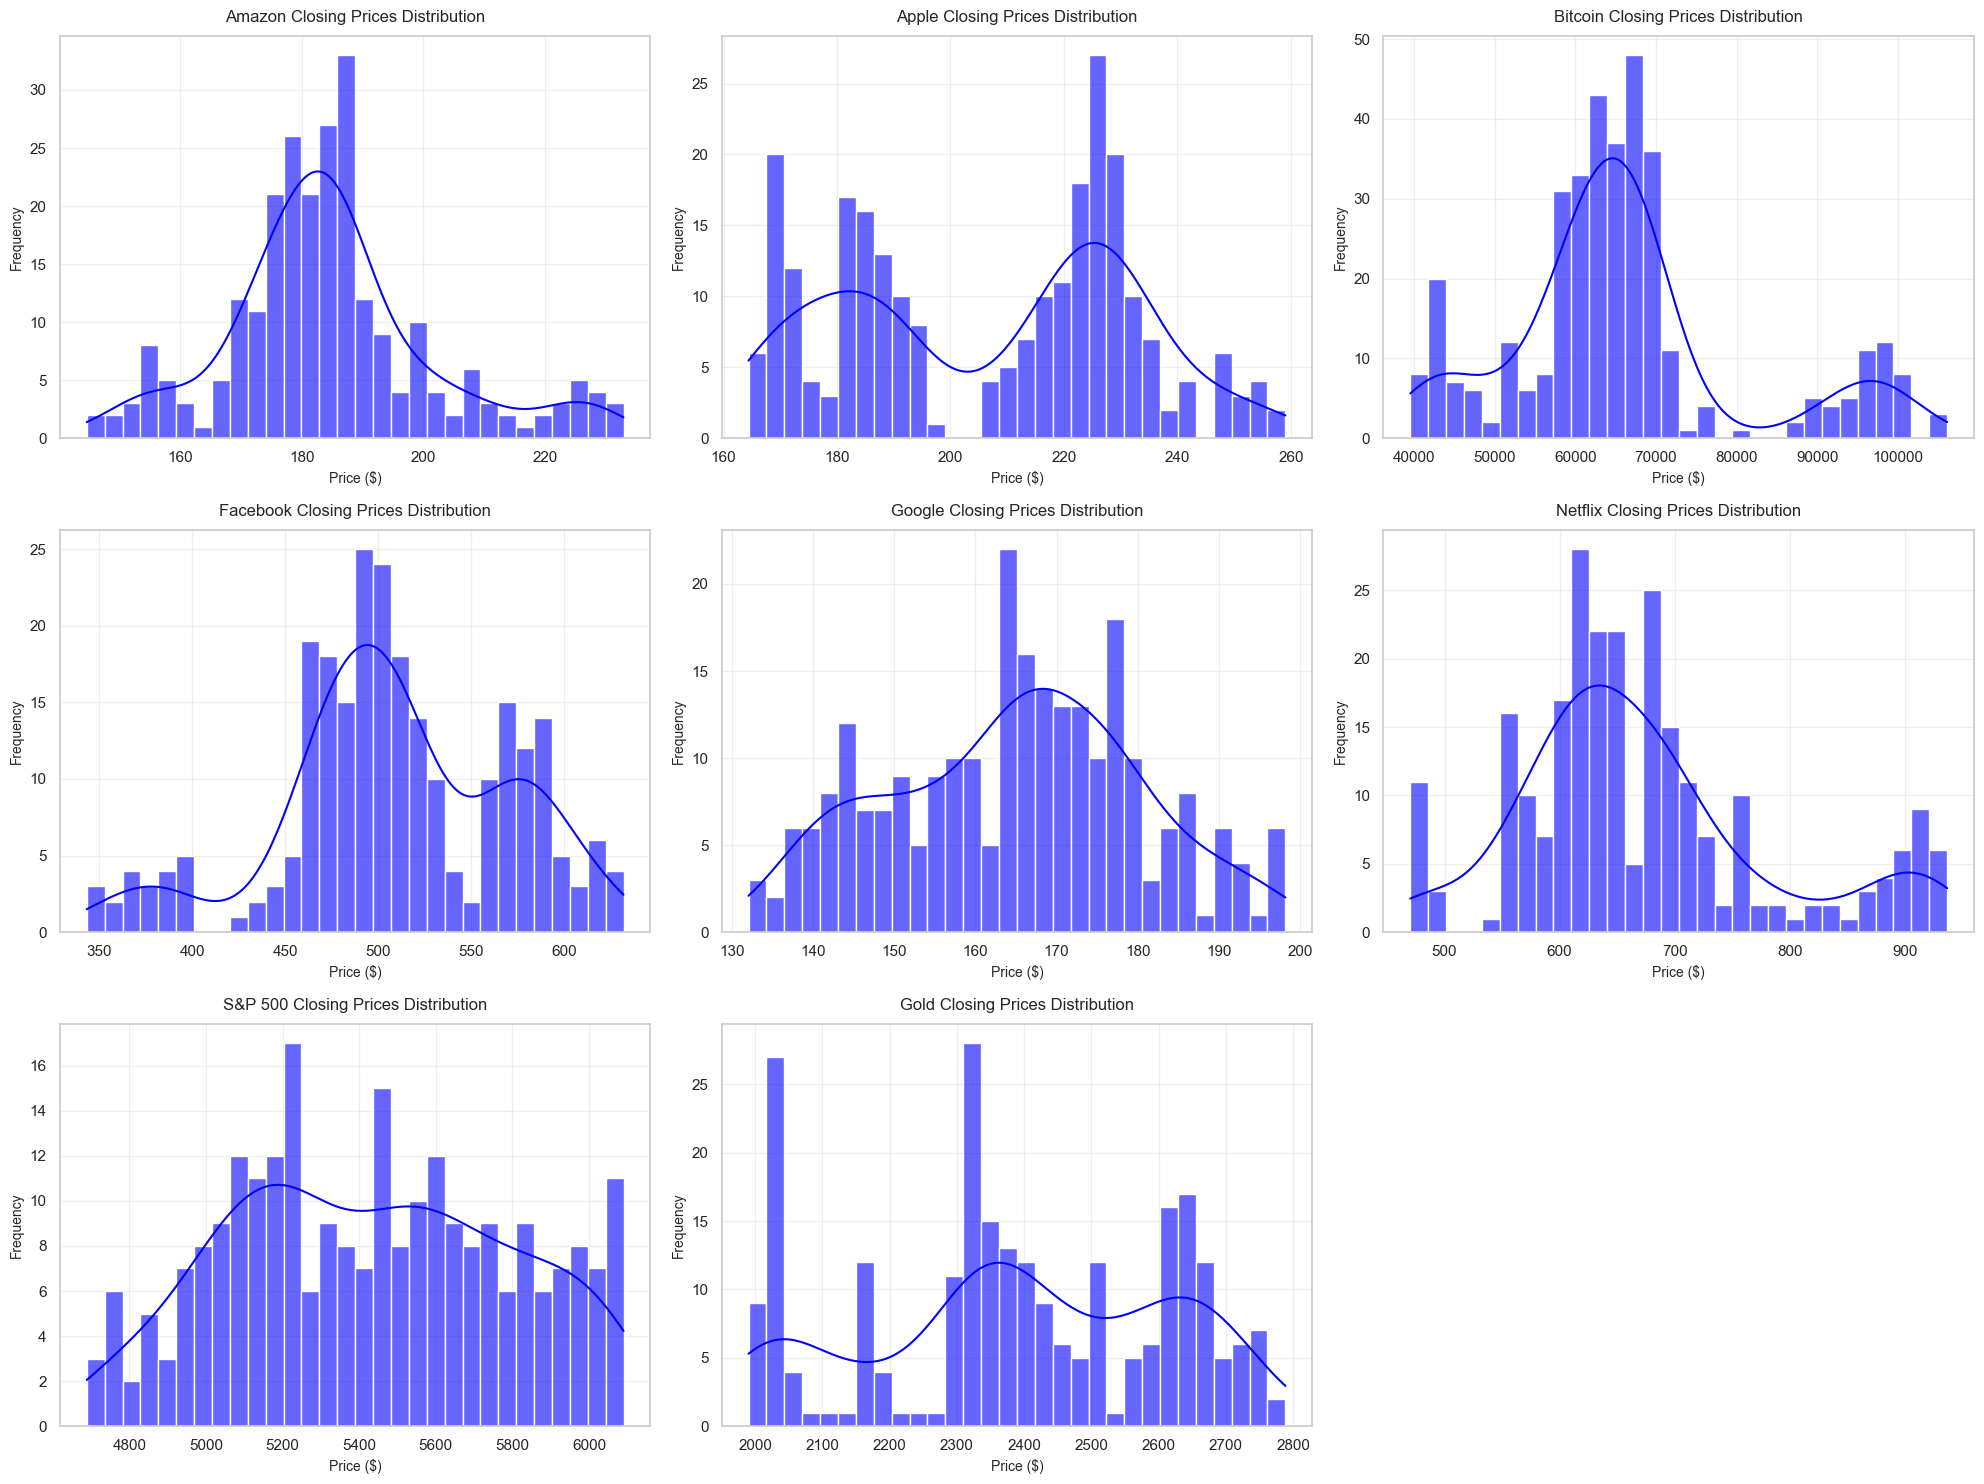

In [27]:
# Load all closing prices into a dictionary
closing_prices = {}
for name, file_name in file_names.items():
    file_path = os.path.join(dataset_dir, file_name)
    df = pd.read_csv(file_path)
    closing_prices[name] = df['Close']

# Create histograms
plt.figure(figsize=(20, 15))

# Calculate number of rows and columns needed
n_stocks = len(closing_prices)
n_cols = 3
n_rows = (n_stocks + n_cols - 1) // n_cols  # Ceiling division

# Create subplots for each stock
for i, (stock, prices) in enumerate(closing_prices.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create histogram with KDE
    sns.histplot(data=prices.dropna(), 
                bins=30, 
                kde=True,
                color='blue',
                alpha=0.6)
    
    # Customize the subplot
    plt.title(f'{stock} Closing Prices Distribution', fontsize=12, pad=10)
    plt.xlabel('Price ($)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0)
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


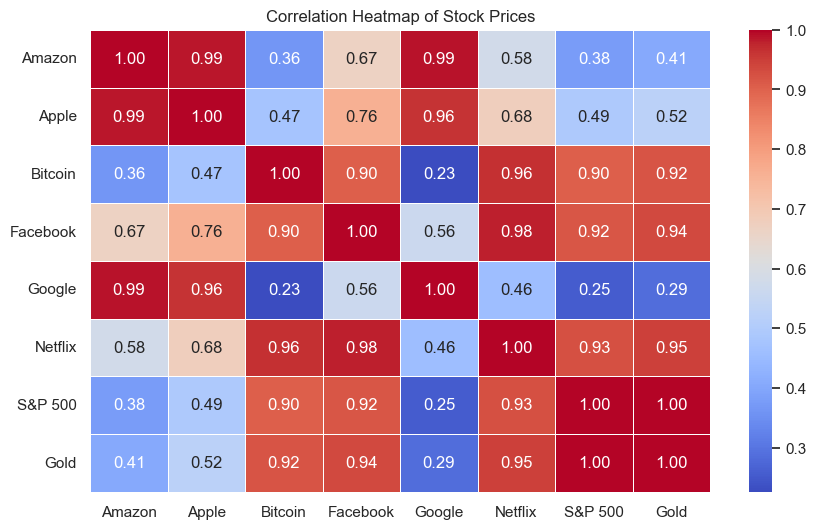

In [28]:
# Create a DataFrame with all assets' 'Close' prices
close_prices = pd.DataFrame(all_assets)

# Compute the correlation matrix
correlation_matrix = close_prices.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()

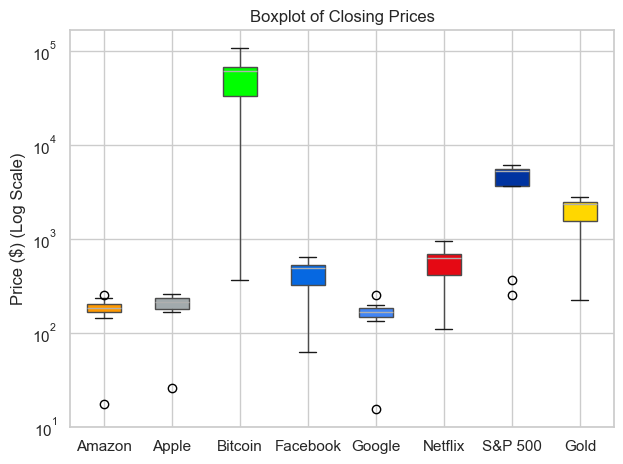

In [29]:
# Convert the dictionary to a DataFrame
all_assets_df = pd.DataFrame(all_assets)

# Extract the colors from the dictionary
file_names_color = {
    "Amazon": ("AMZN_cleaned.csv", "#FF9900"),    # Amazon orange
    "Apple": ("AAPL_cleaned.csv", "#A2AAAD"),     # Apple silver
    "Bitcoin": ("BTC-USD_cleaned.csv", "#00FF00"), # Bitcoin green
    "Facebook": ("META_cleaned.csv", "#0668E1"),   # Meta blue
    "Google": ("GOOG_cleaned.csv", "#4285F4"),     # Google blue
    "Netflix": ("NFLX_cleaned.csv", "#E50914"),    # Netflix red
    "S&P 500": ("GSPC_cleaned.csv", "#0033A0"),    # Dark blue
    "Gold": ("GC_F_cleaned.csv", "#FFD700")        # Gold
}

# Generate a boxplot
boxplot = all_assets_df.boxplot(patch_artist=True, return_type='dict')

# Apply colors to the boxes
colors = [file_names_color[asset][1] for asset in all_assets_df.columns]  # Extract colors in column order
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the plot
plt.yscale('log')  # If you prefer a logarithmic scale
plt.title('Boxplot of Closing Prices')
plt.ylabel('Price ($) (Log Scale)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

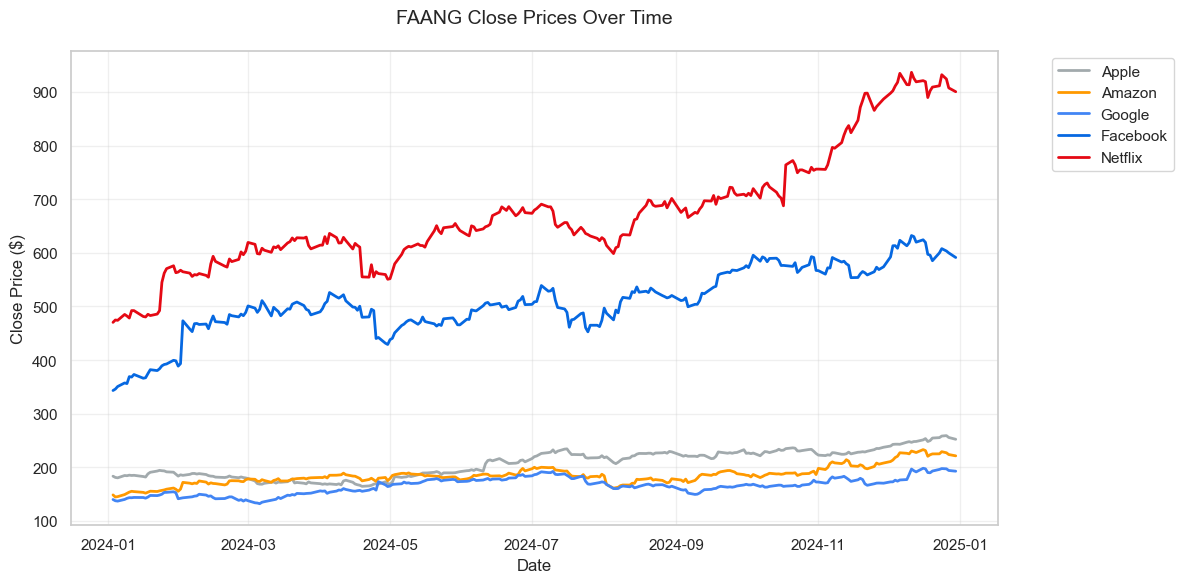

In [30]:
# Name mapping for clearer labels
name_mapping = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'GOOG': 'Google',
    'META': 'Facebook',
    'NFLX': 'Netflix'
}

# Line plot for FAANG stock prices (Close)
plt.figure(figsize=(12, 6))

for ticker, company in name_mapping.items():
    plt.plot(cleaned_data[ticker]['Date'], 
            cleaned_data[ticker]['Close'], 
            label=company,
            color=file_names_color[company][1],
            linewidth=2)

plt.title('FAANG Close Prices Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(dataset_dir, 'faang_prices.png'), 
            dpi=300, 
            bbox_inches='tight')

plt.show()

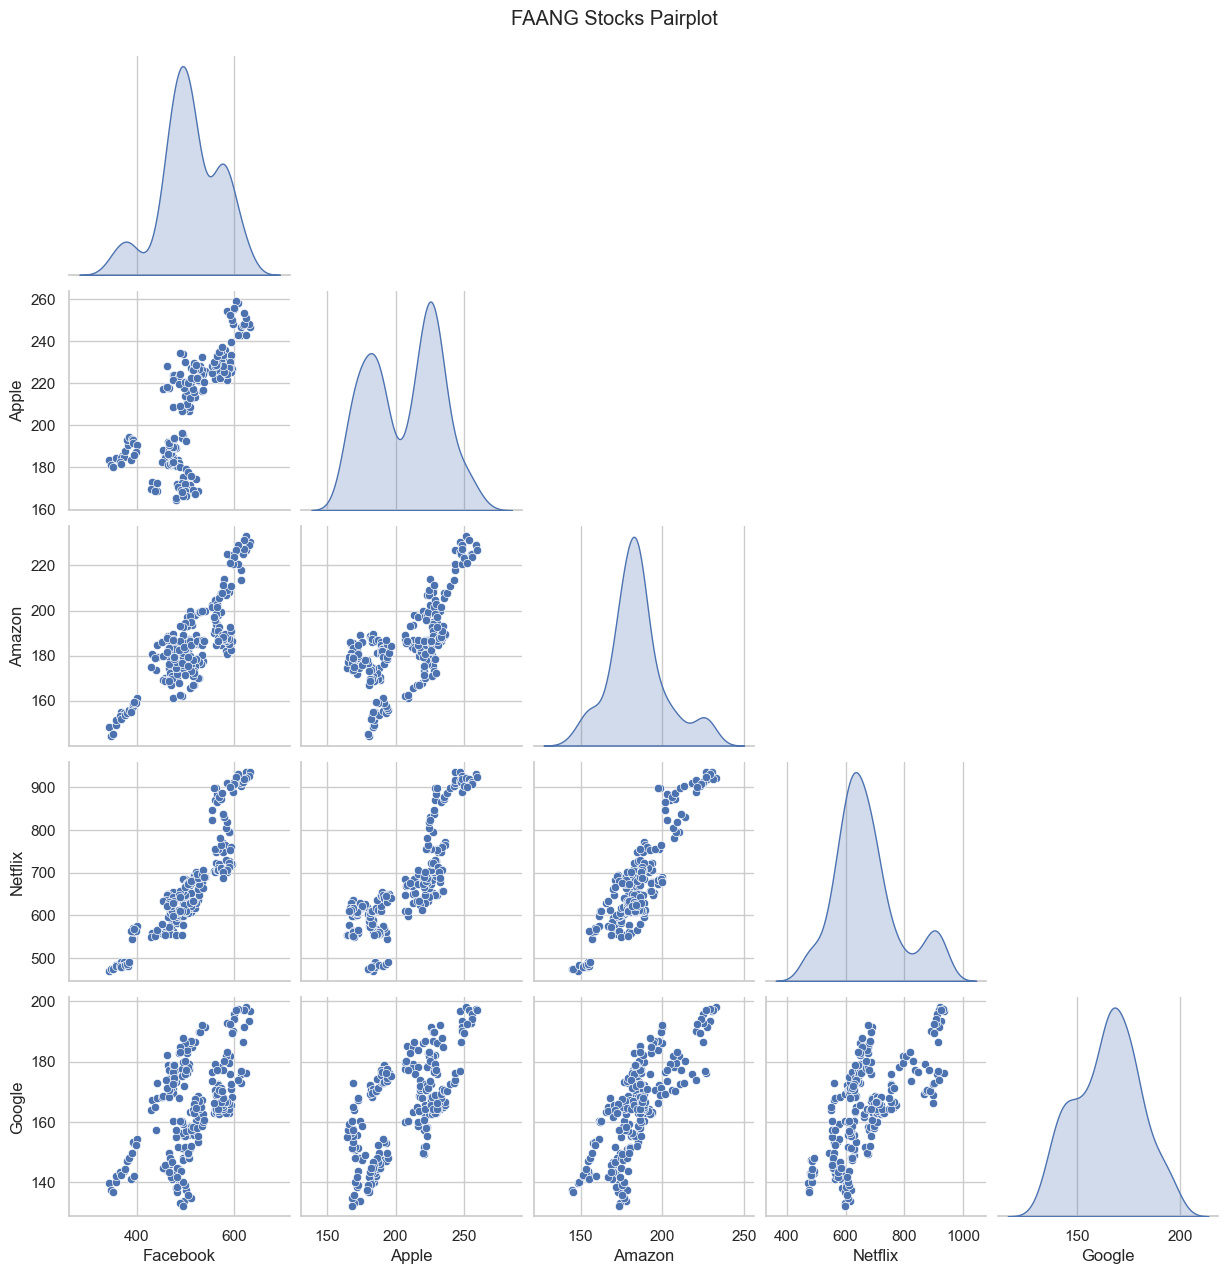

In [31]:
#Pairplot for FAANG stocks
sns.set_theme(style="whitegrid")
faang_viz = faang.reset_index(drop=True)  # Reset index for visualization
sns.pairplot(faang_viz, diag_kind="kde", kind="scatter", corner=True)
plt.suptitle("FAANG Stocks Pairplot", y=1.02)
plt.show()

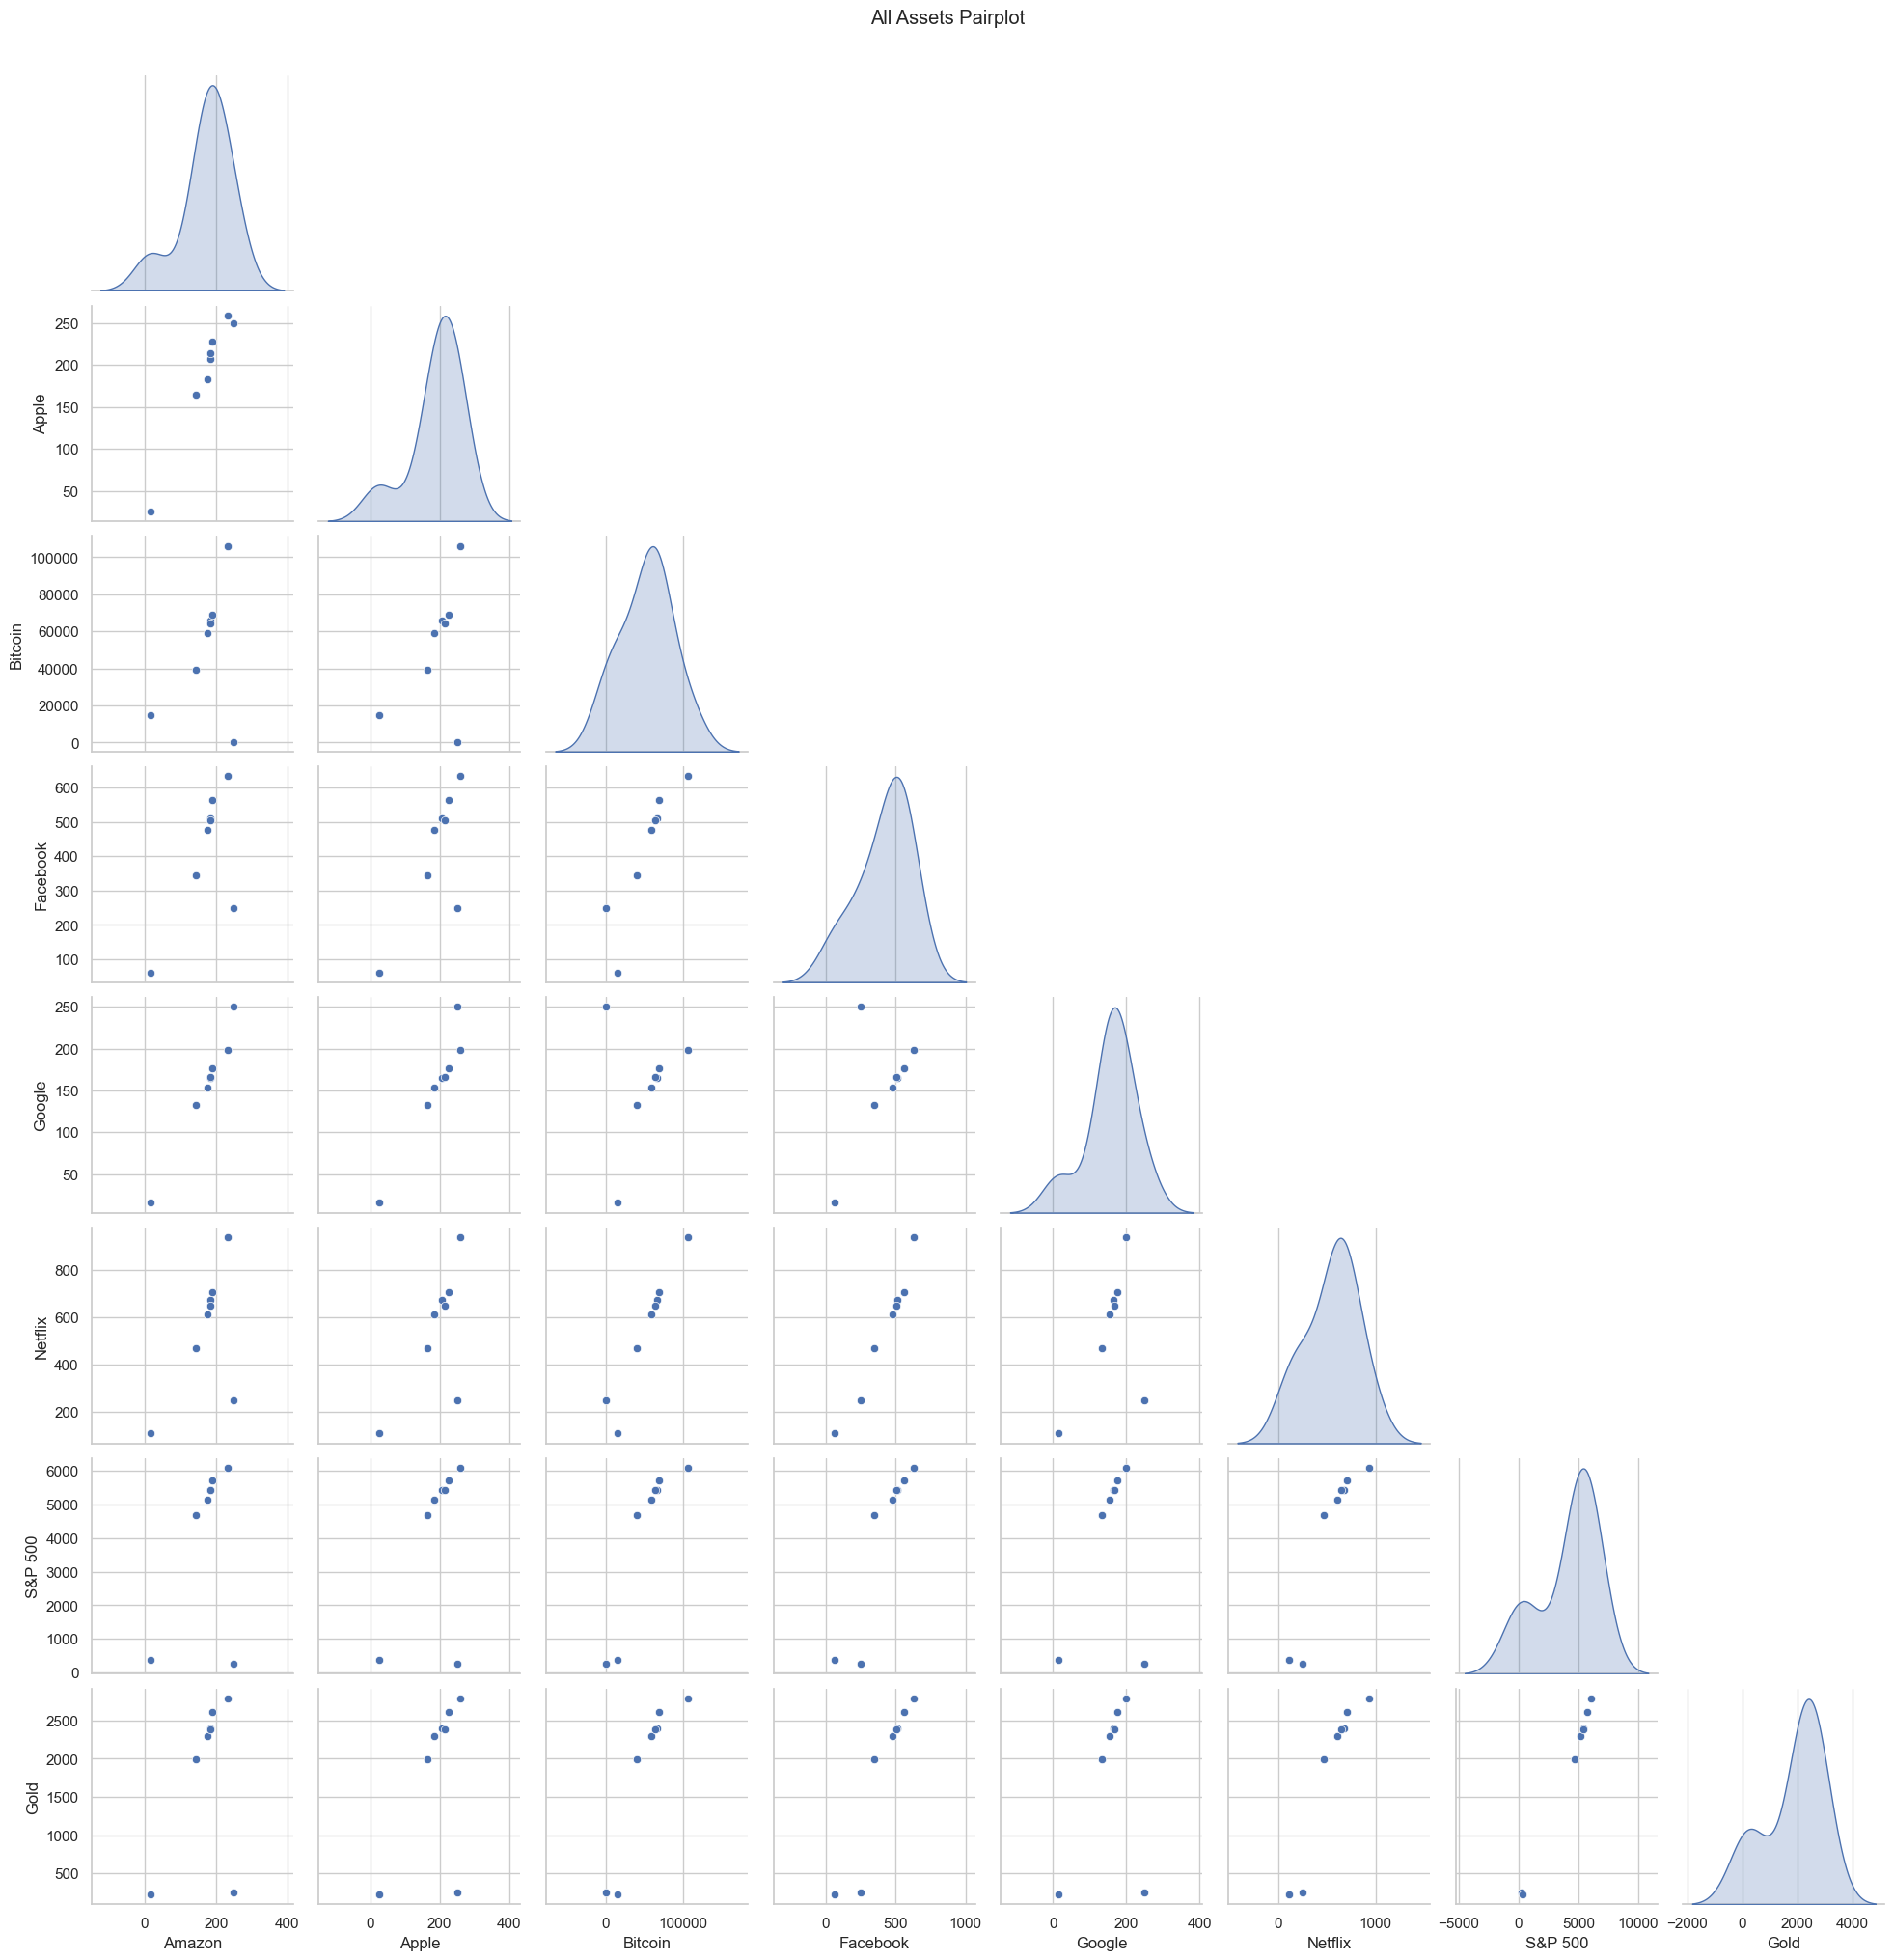

In [32]:
# Example pairplot all assets

faang_all = pd.DataFrame(all_assets).reset_index(drop=True)  # Convert to DataFrame and reset index for visualization
sns.pairplot(faang_all, diag_kind="kde", kind="scatter", corner=True)
plt.suptitle("All Assets Pairplot", y=1.02)
plt.show()

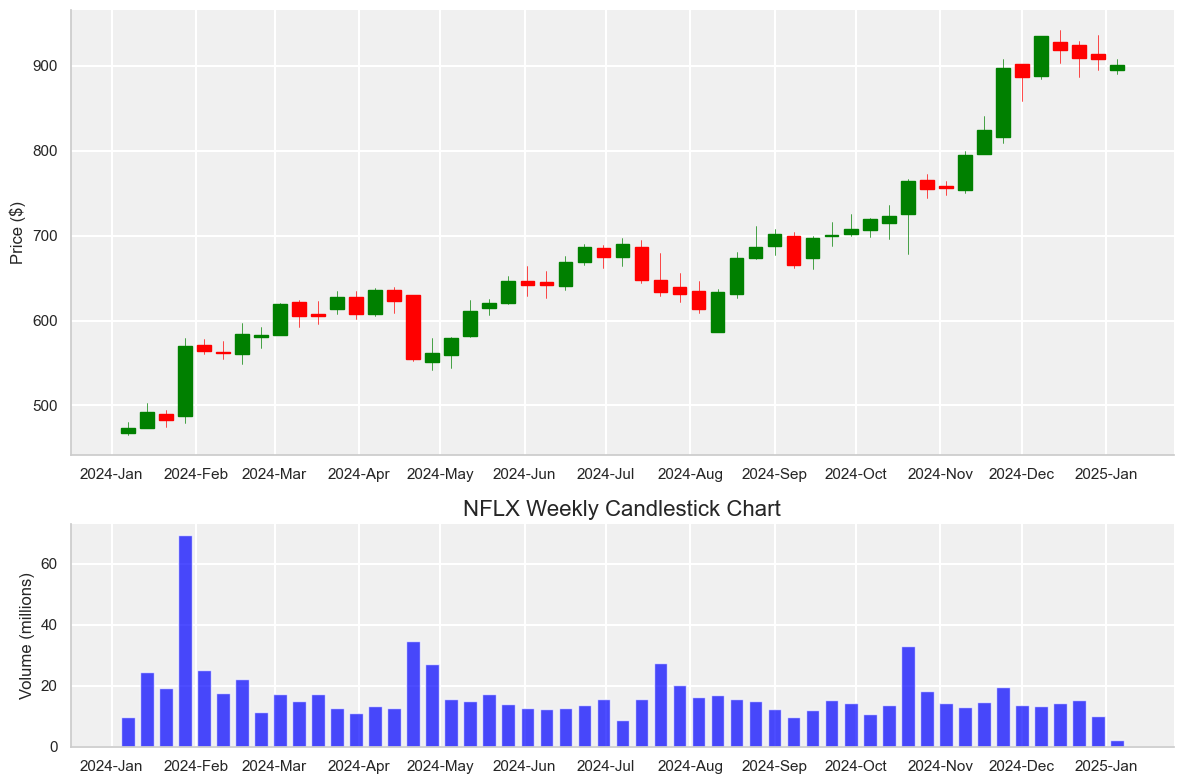


Weekly Trading Summary:
Number of weeks: 53
Average weekly volume: 16.91M
Highest weekly close: $934.74
Lowest weekly close: $474.06


In [33]:
#Candlesticks plot for Netflix stock

# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

# Read the data
df = pd.read_csv(os.path.join(dataset_dir, 'NFLX_cleaned.csv'))
df['Date'] = pd.to_datetime(df['Date'])

# Resample to weekly data
weekly = df.set_index('Date').resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), 
                              gridspec_kw={'height_ratios': [2, 1]},
                              facecolor='white')
plt.subplots_adjust(hspace=0)

# Prepare OHLC data
ohlc = weekly[['Date', 'Open', 'High', 'Low', 'Close']].copy()
ohlc['Date'] = ohlc['Date'].map(mdates.date2num)

# Plot candlestick chart
candlestick_ohlc(ax1, ohlc.values, width=5, 
                 colorup='green', colordown='red',
                 alpha=1)

# Configure the price axis
plt.title('NFLX Weekly Candlestick Chart', fontsize=16)
ax1.set_facecolor('#F0F0F0')
ax1.grid(True, color='white', linewidth=1.5, zorder=0)
ax1.set_ylabel('Price ($)')

# Plot weekly volume bars
ax2.bar(weekly['Date'], weekly['Volume']/1e6, 
        width=5, color='blue', alpha=0.7)
ax2.set_facecolor('#F0F0F0')
ax2.grid(True, color='white', linewidth=1.5, zorder=0)
ax2.set_ylabel('Volume (millions)')

# Format axes
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()

plt.show()

# Print some statistics
print("\nWeekly Trading Summary:")
print("=" * 50)
print(f"Number of weeks: {len(weekly)}")
print(f"Average weekly volume: {weekly['Volume'].mean()/1e6:.2f}M")
print(f"Highest weekly close: ${weekly['Close'].max():.2f}")
print(f"Lowest weekly close: ${weekly['Close'].min():.2f}")


Comprehensive Asset Analysis:
          Annualized Volatility  Sharpe Ratio  Maximum Drawdown    Beta  \
Asset                                                                     
Amazon                   0.2818        1.3977           -0.1949  1.5392   
Apple                    0.2248        1.3253           -0.1535  0.9449   
Bitcoin                  0.4452        1.2361           -0.2618  1.4983   
Facebook                 0.3660        1.5464           -0.1843  1.5439   
Google                   0.2783        1.1248           -0.2228  1.2360   
Netflix                  0.2960        2.2007           -0.1345  1.1387   
S&P 500                  0.1267        1.4874           -0.0849  1.0000   
Gold                     0.1496        1.4174           -0.0799  0.1976   

          Mean Daily Return  Median Daily Return  Start Price   End Price  \
Asset                                                                       
Amazon               0.0018               0.0009     148.4700   

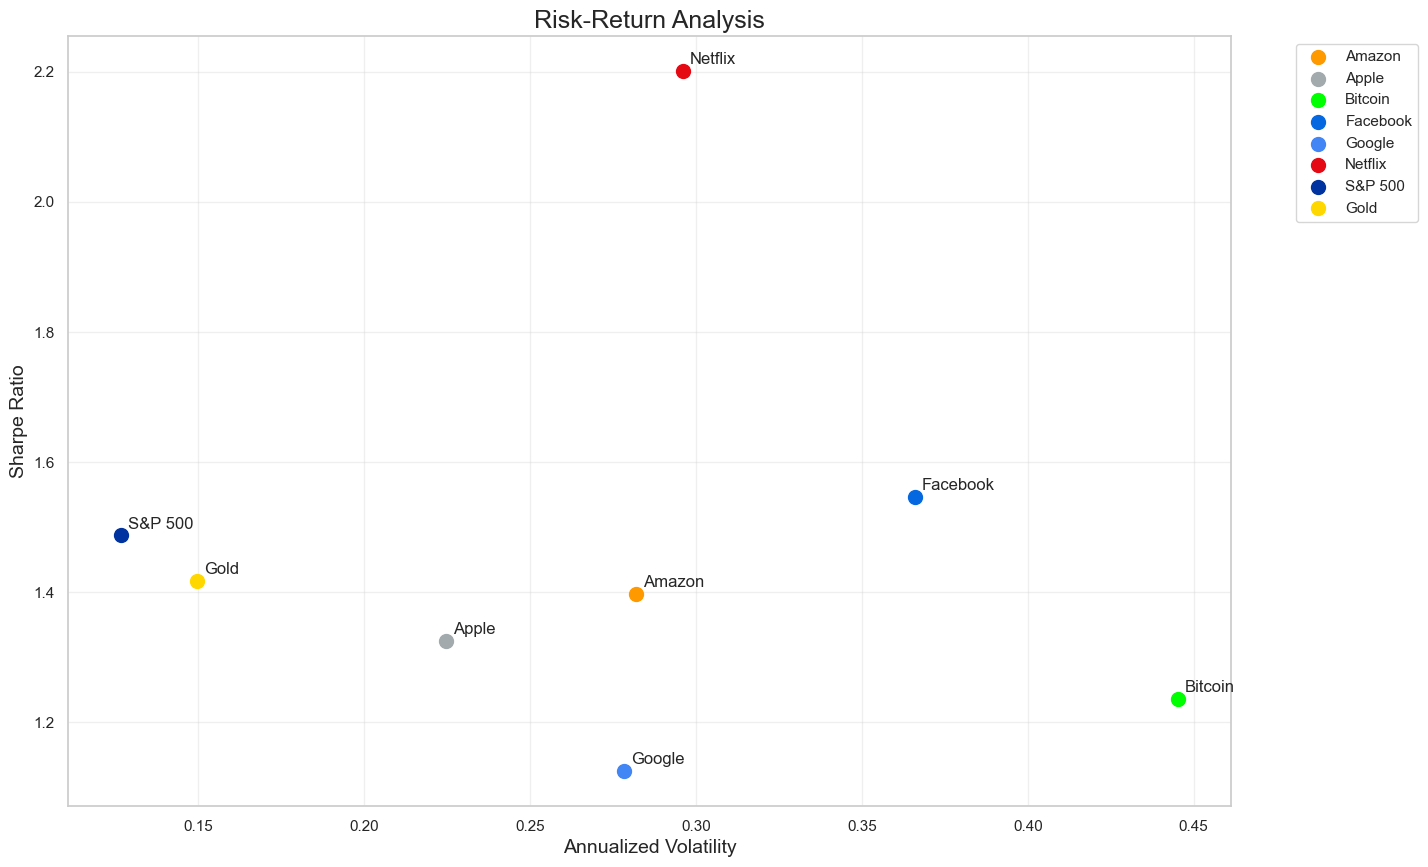


Key Findings:
--------------------------------------------------------------------------------
Highest Sharpe Ratio: Netflix (2.2007)
Lowest Volatility: S&P 500 (0.1267)
Highest Total Return: Bitcoin (106.07%)
Most Defensive (Lowest Beta): Gold (0.1976)

Risk-Return Profile:
--------------------------------------------------------------------------------
Amazon:
  - Risk (Volatility): 28.18%
  - Risk-Adjusted Return (Sharpe): 1.3977
  - Market Sensitivity (Beta): 1.5392
  - Total Return: 49.05%

Apple:
  - Risk (Volatility): 22.48%
  - Risk-Adjusted Return (Sharpe): 1.3253
  - Market Sensitivity (Beta): 0.9449
  - Total Return: 37.55%

Bitcoin:
  - Risk (Volatility): 44.52%
  - Risk-Adjusted Return (Sharpe): 1.2361
  - Market Sensitivity (Beta): 1.4983
  - Total Return: 106.07%

Facebook:
  - Risk (Volatility): 36.60%
  - Risk-Adjusted Return (Sharpe): 1.5464
  - Market Sensitivity (Beta): 1.5439
  - Total Return: 72.29%

Google:
  - Risk (Volatility): 27.83%
  - Risk-Adjusted Return 

In [34]:
# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

class StockAnalyzer:
    def __init__(self, data, name):
        self.data = data
        self.name = name
    
    def annualized_volatility(self):
        """Calculate annualized volatility"""
        daily_returns = self.data['Close'].pct_change()
        return daily_returns.std() * np.sqrt(252)
    
    def daily_returns(self):
        """Calculate daily returns"""
        return self.data['Close'].pct_change()
    
    def sharpe_ratio(self, risk_free_rate=0.05):
        """Calculate Sharpe ratio with given risk-free rate"""
        daily_returns = self.daily_returns()
        excess_returns = daily_returns - risk_free_rate/252
        return np.sqrt(252) * excess_returns.mean() / excess_returns.std()
    
    def max_drawdown(self):
        """Calculate maximum drawdown"""
        cumulative = (1 + self.daily_returns()).cumprod()
        rolling_max = cumulative.expanding(min_periods=1).max()
        drawdowns = cumulative/rolling_max - 1
        return drawdowns.min()
    
    def beta(self, market_data):
        """Calculate beta relative to the market (S&P 500)"""
        stock_returns = self.daily_returns()
        market_returns = market_data['Close'].pct_change()
        covariance = stock_returns.cov(market_returns)
        market_variance = market_returns.var()
        return covariance / market_variance
    
    def analyze(self, market_data):
        """Perform comprehensive analysis"""
        analysis = {
            'Asset': self.name,
            'Annualized Volatility': self.annualized_volatility(),
            'Sharpe Ratio': self.sharpe_ratio(),
            'Maximum Drawdown': self.max_drawdown(),
            'Beta': self.beta(market_data),
            'Mean Daily Return': self.daily_returns().mean(),
            'Median Daily Return': self.daily_returns().median(),
            'Start Price': self.data['Close'].iloc[0],
            'End Price': self.data['Close'].iloc[-1],
            'Total Return': (self.data['Close'].iloc[-1] / self.data['Close'].iloc[0] - 1)
        }
        return analysis

# Define file names and colors for all datasets
file_names_color = {
    "Amazon": ("AMZN_cleaned.csv", "#FF9900"),    # Amazon orange
    "Apple": ("AAPL_cleaned.csv", "#A2AAAD"),     # Apple silver
    "Bitcoin": ("BTC-USD_cleaned.csv", "#00FF00"), # Bitcoin green
    "Facebook": ("META_cleaned.csv", "#0668E1"),   # Meta blue
    "Google": ("GOOG_cleaned.csv", "#4285F4"),     # Google blue
    "Netflix": ("NFLX_cleaned.csv", "#E50914"),    # Netflix red
    "S&P 500": ("GSPC_cleaned.csv", "#0033A0"),    # Dark blue
    "Gold": ("GC_F_cleaned.csv", "#FFD700")        # Gold
}

# Load and analyze all assets
assets_data = {}
market_data = None

# First load market data (S&P 500)
sp500_path = os.path.join(dataset_dir, file_names_color["S&P 500"][0])
market_data = pd.read_csv(sp500_path)
market_data['Date'] = pd.to_datetime(market_data['Date'])
market_data.set_index('Date', inplace=True)

# Load and analyze all other assets
analysis_results = []
for name, (file_name, color) in file_names_color.items():
    file_path = os.path.join(dataset_dir, file_name)
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    analyzer = StockAnalyzer(data, name)
    result = analyzer.analyze(market_data)
    analysis_results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(analysis_results)

# Format the results
results_df = results_df.set_index('Asset')
results_df = results_df.round(4)

# Print formatted results
print("\nComprehensive Asset Analysis:")
print("=" * 80)
print(results_df)

# Create visualization of key metrics
plt.figure(figsize=(15, 10))

# Plot volatility vs Sharpe ratio with colors from dictionary
for name, (_, color) in file_names_color.items():
    plt.scatter(results_df.loc[name, 'Annualized Volatility'],
               results_df.loc[name, 'Sharpe Ratio'],
               color=color,
               s=100,
               label=name)

# Add labels for each point
for idx, row in results_df.iterrows():
    plt.annotate(idx, 
                (row['Annualized Volatility'], row['Sharpe Ratio']),
                xytext=(5, 5), 
                textcoords='offset points')

plt.title('Risk-Return Analysis', fontsize=18)
plt.xlabel('Annualized Volatility', fontsize=14) #Measures the standard deviation of daily returns, scaled to a yearly basis.
plt.ylabel('Sharpe Ratio', fontsize=14) #return above the risk-free rate per unit of volatility or total risk.
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Print summary statistics
print("\nKey Findings:")
print("-" * 80)
print(f"Highest Sharpe Ratio: {results_df['Sharpe Ratio'].idxmax()} ({results_df['Sharpe Ratio'].max():.4f})")
print(f"Lowest Volatility: {results_df['Annualized Volatility'].idxmin()} ({results_df['Annualized Volatility'].min():.4f})")
print(f"Highest Total Return: {results_df['Total Return'].idxmax()} ({results_df['Total Return'].max():.2%})")
print(f"Most Defensive (Lowest Beta): {results_df['Beta'].idxmin()} ({results_df['Beta'].min():.4f})")

# Additional analysis
print("\nRisk-Return Profile:")
print("-" * 80)
for name in results_df.index:
    volatility = results_df.loc[name, 'Annualized Volatility']
    sharpe = results_df.loc[name, 'Sharpe Ratio']
    beta = results_df.loc[name, 'Beta']  #Market sensitivity to the overall market, likely the S&P 500).
    total_return = results_df.loc[name, 'Total Return']
    print(f"{name}:")
    print(f"  - Risk (Volatility): {volatility:.2%}")
    print(f"  - Risk-Adjusted Return (Sharpe): {sharpe:.4f}")
    print(f"  - Market Sensitivity (Beta): {beta:.4f}")
    print(f"  - Total Return: {total_return:.2%}\n")

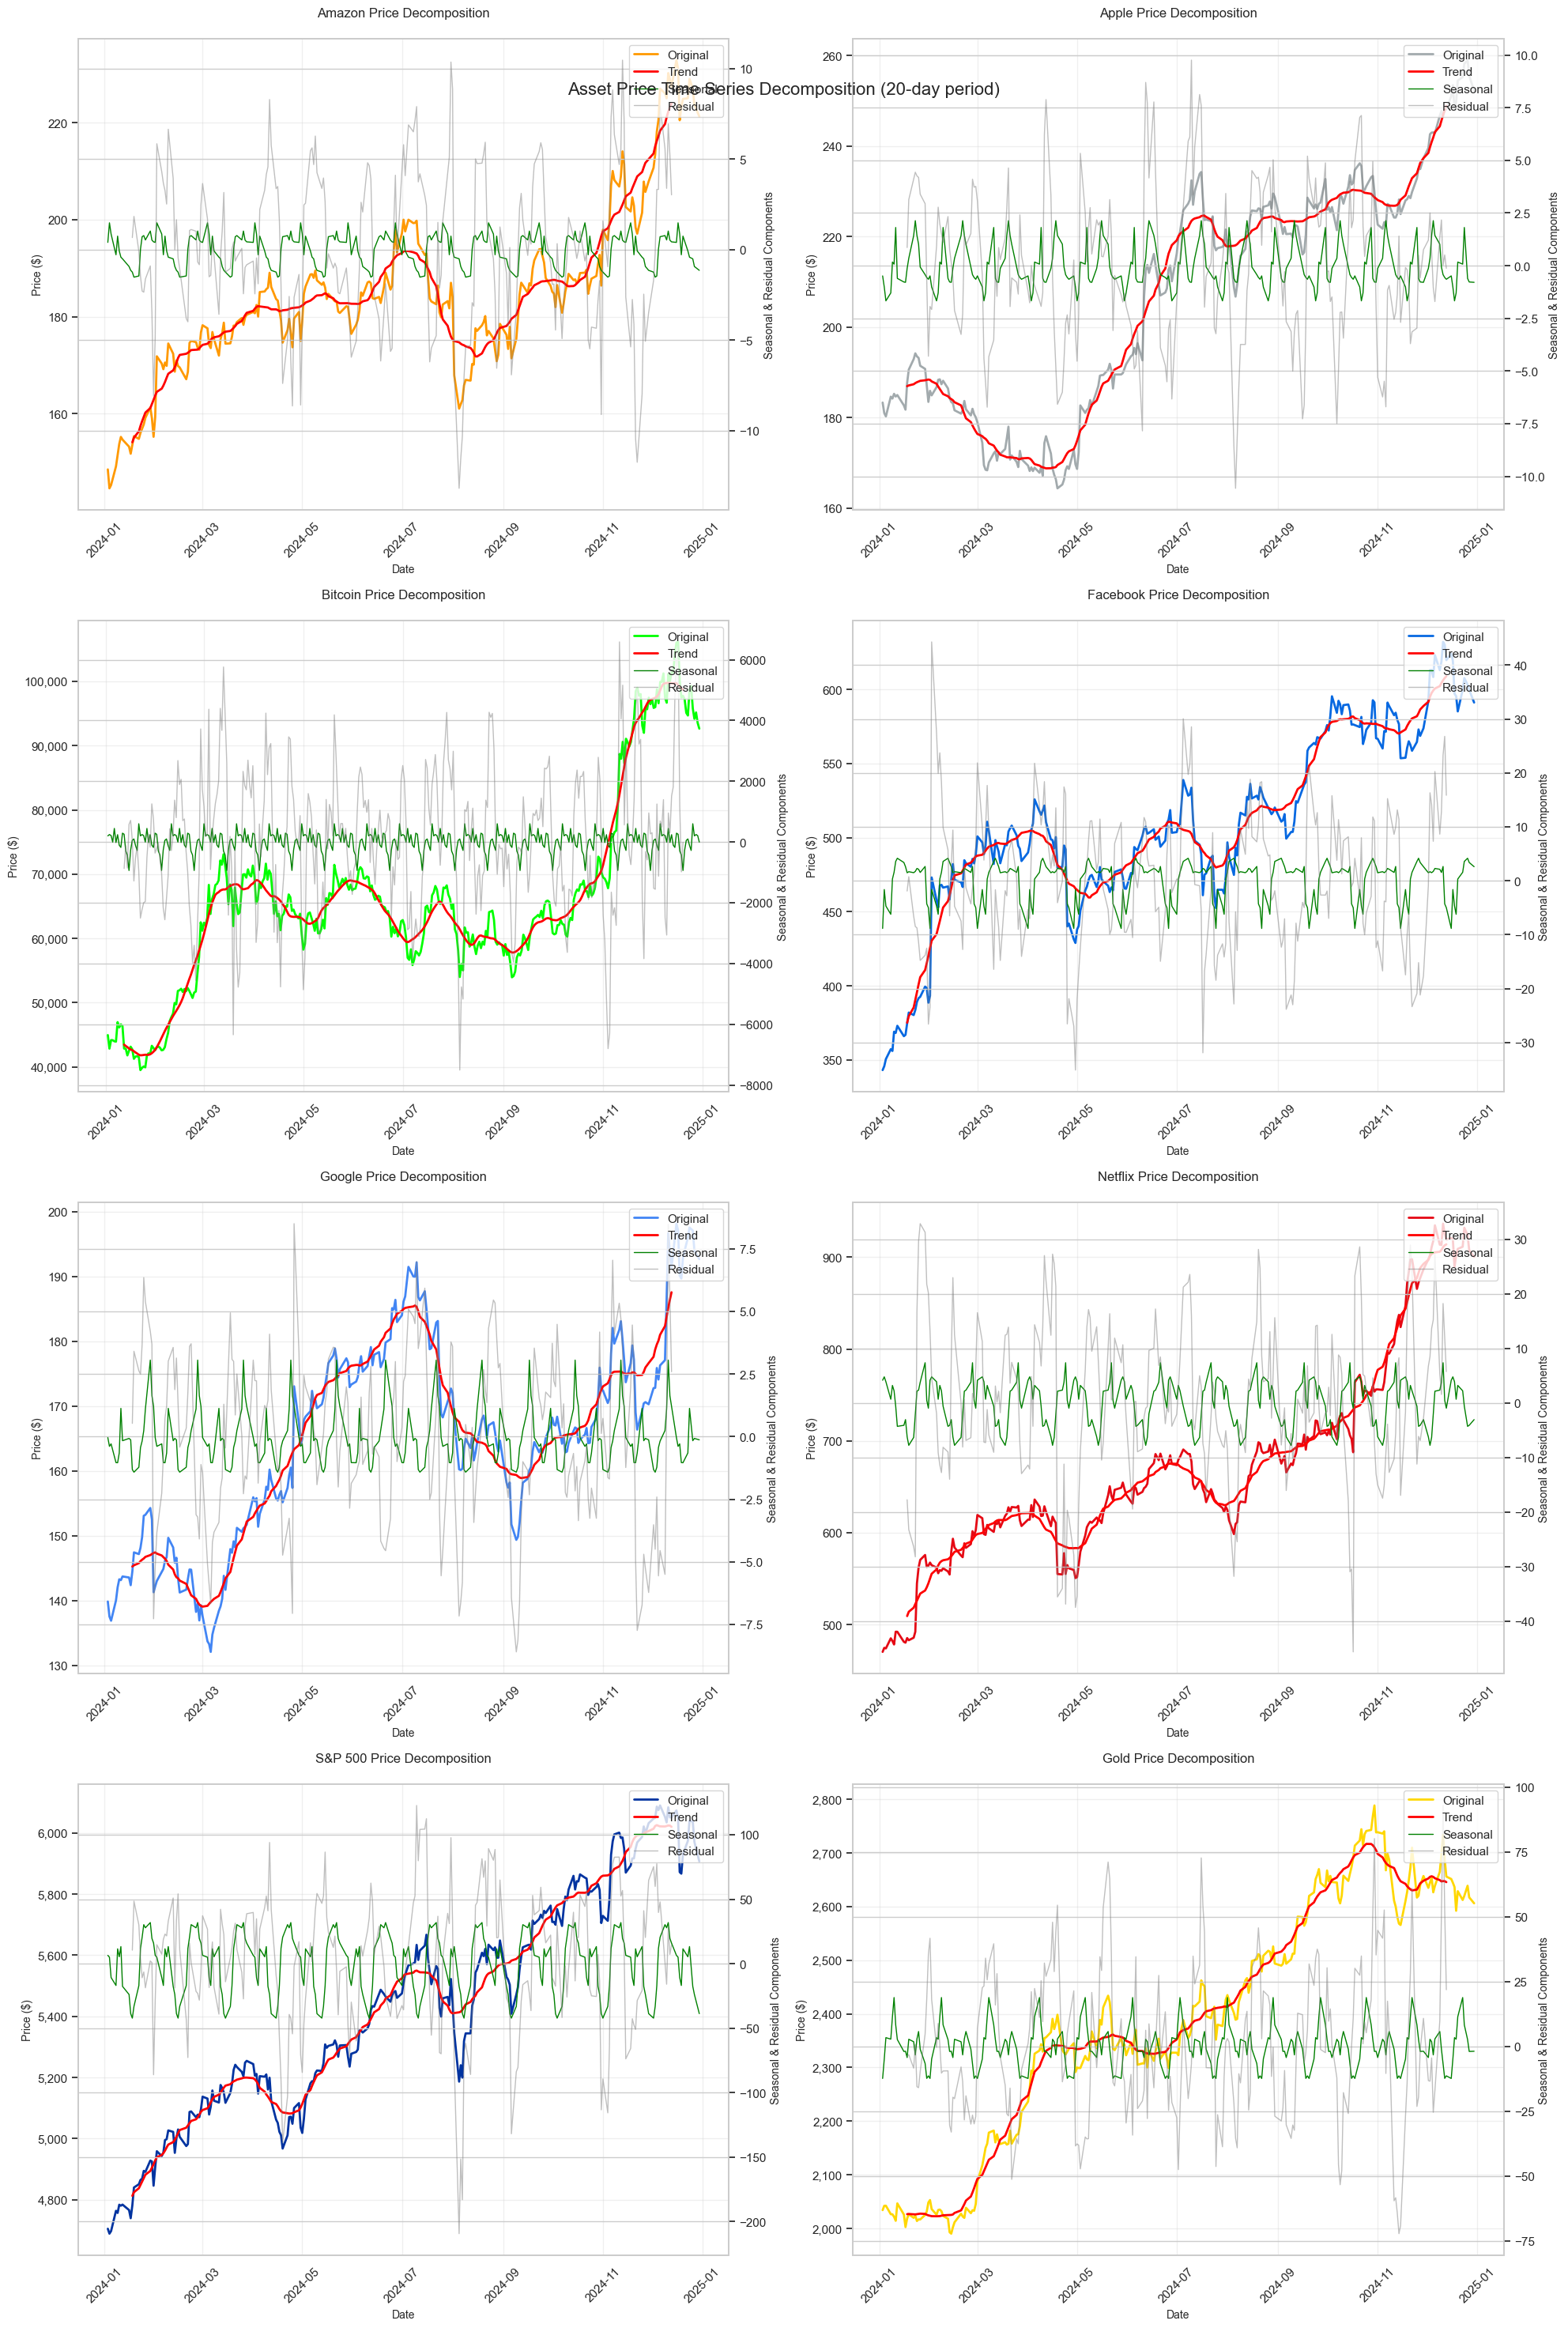


Time Series Decomposition Analysis:

Amazon:
  Trend Strength: 0.7469
  Seasonal Strength: 0.0506
  Noise Strength: 0.2530

Apple:
  Trend Strength: 0.9325
  Seasonal Strength: 0.0404
  Noise Strength: 0.1412

Bitcoin:
  Trend Strength: 0.8980
  Seasonal Strength: 0.0231
  Noise Strength: 0.1555

Facebook:
  Trend Strength: 0.7989
  Seasonal Strength: 0.0597
  Noise Strength: 0.2074

Google:
  Trend Strength: 0.8574
  Seasonal Strength: 0.0706
  Noise Strength: 0.2203

Netflix:
  Trend Strength: 0.8364
  Seasonal Strength: 0.0376
  Noise Strength: 0.1318

S&P 500:
  Trend Strength: 0.8911
  Seasonal Strength: 0.0616
  Noise Strength: 0.1430

Gold:
  Trend Strength: 0.9392
  Seasonal Strength: 0.0346
  Noise Strength: 0.1310


In [35]:
# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

# Define file names and colors for all datasets
file_names_color = {
    "Amazon": ("AMZN_cleaned.csv", "#FF9900"),    # Amazon orange
    "Apple": ("AAPL_cleaned.csv", "#A2AAAD"),     # Apple silver
    "Bitcoin": ("BTC-USD_cleaned.csv", "#00FF00"), # Bitcoin green
    "Facebook": ("META_cleaned.csv", "#0668E1"),   # Meta blue
    "Google": ("GOOG_cleaned.csv", "#4285F4"),     # Google blue
    "Netflix": ("NFLX_cleaned.csv", "#E50914"),    # Netflix red
    "S&P 500": ("GSPC_cleaned.csv", "#0033A0"),    # Dark blue
    "Gold": ("GC_F_cleaned.csv", "#FFD700")        # Gold
}

class StockModeler:
    @staticmethod
    def decompose(data, period):
        return sm.tsa.seasonal_decompose(data['Close'], period=period)

# Create a figure with subplots for each asset
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle('Asset Price Time Series Decomposition (20-day period)', fontsize=16, y=0.95)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Process each asset
for idx, (name, (file_name, color)) in enumerate(file_names_color.items()):
    try:
        # Read data
        file_path = os.path.join(dataset_dir, file_name)
        data = pd.read_csv(file_path)
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)
        
        # Perform decomposition
        decomposition = StockModeler.decompose(data, 20)
        
        # Plot on the corresponding subplot
        ax = axes_flat[idx]
        
        # Original and Trend
        ax.plot(decomposition.observed.index, decomposition.observed, color=color, label='Original', linewidth=2)
        ax.plot(decomposition.trend.index, decomposition.trend, color='red', label='Trend', linewidth=2)
        
        # Seasonal and Residual on secondary y-axis
        ax2 = ax.twinx()
        ax2.plot(decomposition.seasonal.index, decomposition.seasonal, color='green', label='Seasonal', linewidth=1)
        ax2.plot(decomposition.resid.index, decomposition.resid, color='gray', alpha=0.5, label='Residual', linewidth=1)
        
        # Customize plot
        ax.set_title(f'{name} Price Decomposition', pad=20, fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('Date', fontsize=10)
        ax.set_ylabel('Price ($)', fontsize=10)
        ax2.set_ylabel('Seasonal & Residual Components', fontsize=10)
        
        # Format y-axis with comma separator
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
        
        # Rotate x-axis labels
        ax.tick_params(axis='x', rotation=45)
        
        # Add legends
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
        
    except Exception as e:
        print(f"Error processing {name}: {str(e)}")

# Adjust layout
plt.tight_layout()

plt.show()

# Print summary statistics for each decomposition
print("\nTime Series Decomposition Analysis:")
print("=" * 80)

for name, (file_name, _) in file_names_color.items():
    try:
        # Read data
        file_path = os.path.join(dataset_dir, file_name)
        data = pd.read_csv(file_path)
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)
        
        # Perform decomposition
        decomposition = StockModeler.decompose(data, 20)
        
        # Calculate statistics
        trend_strength = decomposition.trend.std() / decomposition.observed.std()
        seasonal_strength = decomposition.seasonal.std() / decomposition.observed.std()
        noise_strength = decomposition.resid.std() / decomposition.observed.std()
        
        print(f"\n{name}:")
        print(f"  Trend Strength: {trend_strength:.4f}")
        print(f"  Seasonal Strength: {seasonal_strength:.4f}")
        print(f"  Noise Strength: {noise_strength:.4f}")
        
    except Exception as e:
        print(f"Error analyzing {name}: {str(e)}")

Plotting cumulative returns for all assets...

Plotting portfolio comparisons...

Portfolio Statistics:

FAANG:
Average Daily Return: 0.1954%
Daily Return Std Dev: 1.8192%
Total Return: 157.63%

FAANG + Gold + S&P 500:
Average Daily Return: 0.1678%
Daily Return Std Dev: 1.5475%
Total Return: 148.83%

FAANG + Gold + S&P 500 + Bitcoin:
Average Daily Return: 0.1306%
Daily Return Std Dev: 1.4737%
Total Return: 155.98%


C:\Users\alanm\AppData\Local\Temp\ipykernel_27336\3237848121.py:70: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return data.pct_change().fillna(0)
C:\Users\alanm\AppData\Local\Temp\ipykernel_27336\3237848121.py:70: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return data.pct_change().fillna(0)
C:\Users\alanm\AppData\Local\Temp\ipykernel_27336\3237848121.py:70: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not 

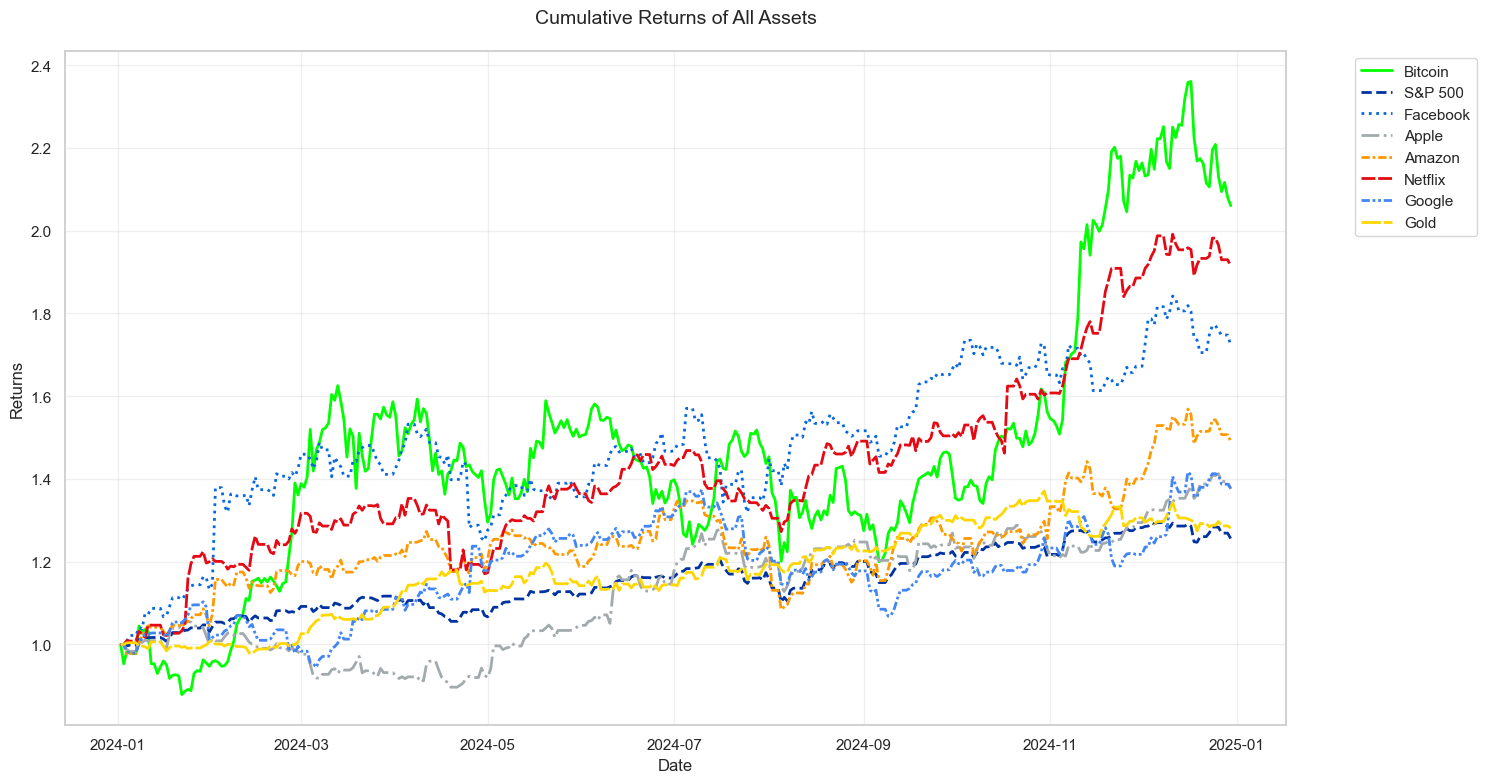

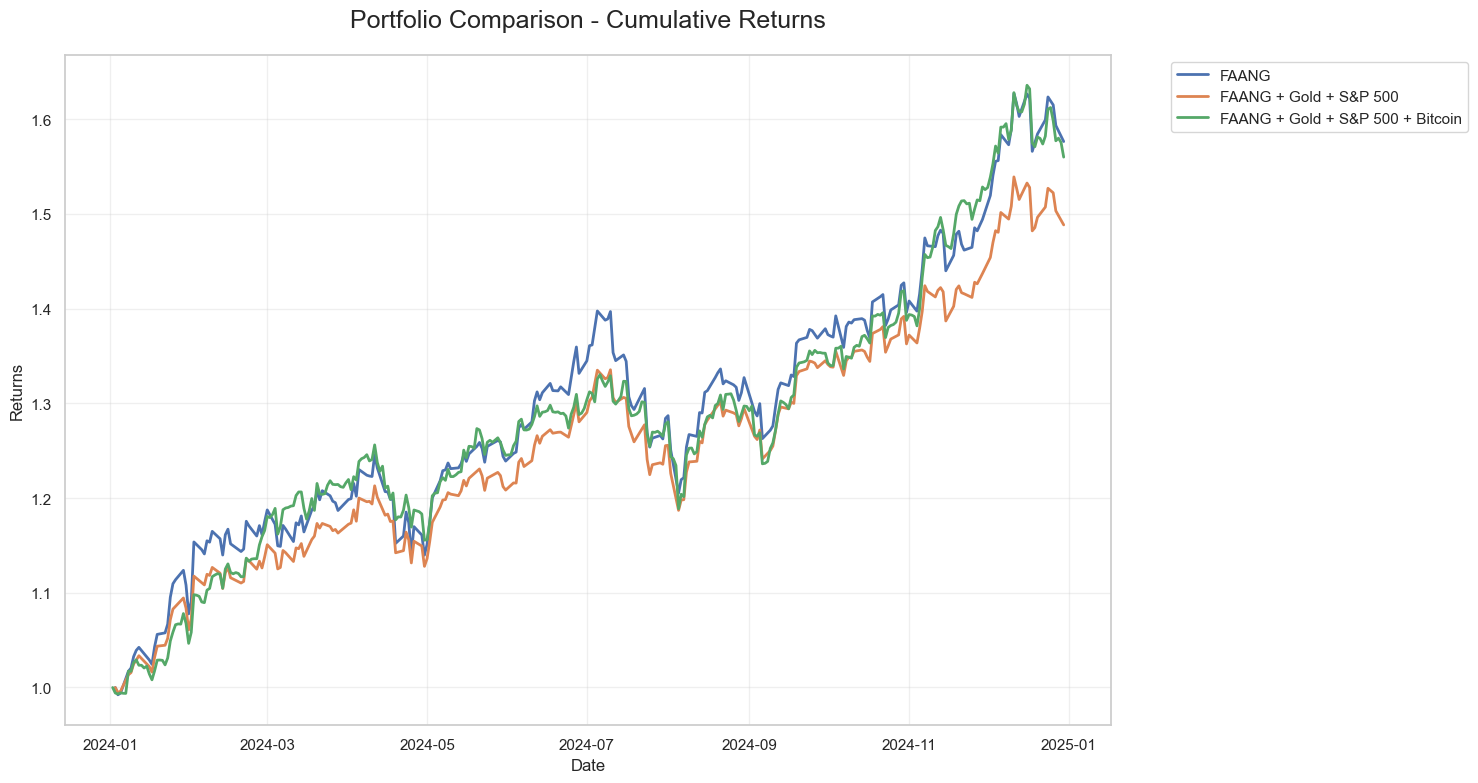

In [36]:
#Portfolio Analysis and Visualization

# Define the directory for datasets
dataset_dir = r"C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis"

# Define file names and colors for all datasets
file_names_color = {
    "Amazon": ("AMZN_cleaned.csv", "#FF9900"),    # Amazon orange
    "Apple": ("AAPL_cleaned.csv", "#A2AAAD"),     # Apple silver
    "Bitcoin": ("BTC-USD_cleaned.csv", "#00FF00"), # Bitcoin green
    "Facebook": ("META_cleaned.csv", "#0668E1"),   # Meta blue
    "Google": ("GOOG_cleaned.csv", "#4285F4"),     # Google blue
    "Netflix": ("NFLX_cleaned.csv", "#E50914"),    # Netflix red
    "S&P 500": ("GSPC_cleaned.csv", "#0033A0"),    # Dark blue
    "Gold": ("GC_F_cleaned.csv", "#FFD700")        # Gold
}

# Load all data
def load_data(file_name):
    """Load and prepare data from CSV"""
    file_path = os.path.join(dataset_dir, file_name)
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# Load all datasets
data_dict = {name: load_data(file_info[0]) for name, file_info in file_names_color.items()}

def group_stocks(stock_dict):
    """Groups stock data from a dictionary into a single DataFrame"""
    return pd.concat({key: stock['Close'] for key, stock in stock_dict.items()}, axis=1)

# Create portfolios
# Create FAANG portfolio
Faang = group_stocks({
    'Facebook': meta,
    'Apple': aapl,
    'Amazon': amzn,
    'Netflix': nflx,
    'Google': goog
})

# Create FAANG + Gold portfolio
Faang_Gold_SP = group_stocks({
    'Facebook': meta,
    'Apple': aapl,
    'Amazon': amzn,
    'Netflix': nflx,
    'Google': goog,
    'Gold': gold,
    'S&P 500': sp500
})

# Create All Assets portfolio
Faang_Gold_SP_Bitcoin = group_stocks({
    'Bitcoin': bitcoin,
    'S&P 500': sp500,
    'Facebook': meta,
    'Apple': aapl,
    'Amazon': amzn,
    'Netflix': nflx,
    'Google': goog,
    'Gold': gold    
})

# Functions for calculating returns
def calculate_returns(data):
    """Calculates daily returns"""
    return data.pct_change().fillna(0)

def calculate_cumulative_returns(data):
    """Calculates cumulative returns"""
    returns = calculate_returns(data)
    return (1 + returns).cumprod()

# Plotting functions with colors
def plot_cumulative_returns(data):
    """Plots cumulative returns using colors from dictionary and different line styles"""
    cumulative_returns = calculate_cumulative_returns(data)
    
    # Define different line styles
    line_styles = {
        'Bitcoin': '-',      # solid
        'S&P 500': '--',     # dashed
        'Facebook': ':',     # dotted
        'Apple': '-.',       # dash-dot
        'Amazon': (0, (3, 1, 1, 1)),  # dash-dot-dot
        'Netflix': (0, (5, 1)),       # long dash
        'Google': (0, (3, 1, 1, 1, 1, 1)),  # dash-dot-dot-dot
        'Gold': (0, (7, 1),)  # densely dashed
    }
    
    plt.figure(figsize=(15, 8))
    for col in cumulative_returns.columns:
        color = file_names_color[col][1] if col in file_names_color else '#333333'
        plt.plot(cumulative_returns[col], 
                label=col, 
                color=color, 
                linewidth=2,
                linestyle=line_styles[col])
    
    plt.title("Cumulative Returns of All Assets", fontsize=14, pad=20)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Returns", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
   
def plot_grouped_cumulative_returns(*datasets, labels):
    """Plots cumulative returns for grouped datasets"""
    plt.figure(figsize=(15, 8))
    
    for data, label in zip(datasets, labels):
        cumulative_returns = calculate_cumulative_returns(data).mean(axis=1)
        plt.plot(cumulative_returns, label=label, linewidth=2)

        
    plt.title("Portfolio Comparison - Cumulative Returns", fontsize=18, pad=20)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Returns", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
   
# Calculate returns for all portfolios

# Generate plots
print("Plotting cumulative returns for all assets...")
plot_cumulative_returns(Faang_Gold_SP_Bitcoin)

print("\nPlotting portfolio comparisons...")
plot_grouped_cumulative_returns(Faang, Faang_Gold_SP, Faang_Gold_SP_Bitcoin, 
                              labels=["FAANG", "FAANG + Gold + S&P 500", "FAANG + Gold + S&P 500 + Bitcoin"])


# Print portfolio statistics
print("\nPortfolio Statistics:")
print("=" * 80)
for portfolio_name, portfolio in [("FAANG", Faang), 
                                ("FAANG + Gold + S&P 500", Faang_Gold_SP), 
                                ("FAANG + Gold + S&P 500 + Bitcoin", Faang_Gold_SP_Bitcoin)]:
    returns = calculate_returns(portfolio)
    cum_returns = calculate_cumulative_returns(portfolio)
    
    print(f"\n{portfolio_name}:")
    print(f"Average Daily Return: {returns.mean().mean():.4%}")
    print(f"Daily Return Std Dev: {returns.std().mean():.4%}")
    print(f"Total Return: {cum_returns.iloc[-1].mean():.2%}")

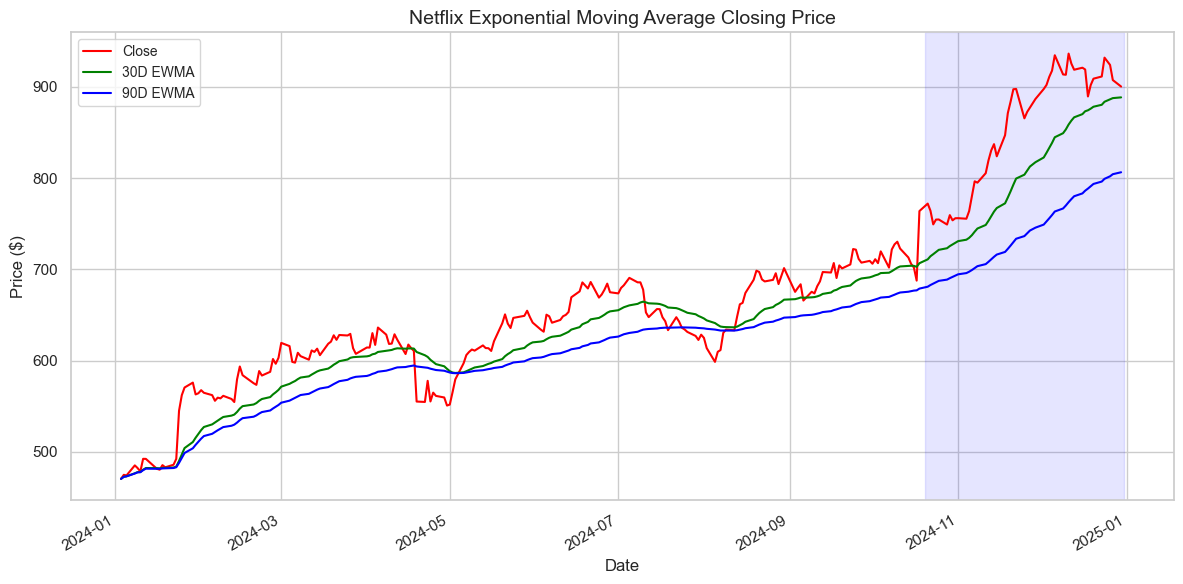

In [37]:
# Exponential moving average

file_path = r'C:\Users\alanm\OneDrive\Documents\MADS\Capstone1\Financial_Analysis\NFLX_data.csv'

# Reload the dataset with appropriate adjustments to align headers
nflx_data_corrected = pd.read_csv(file_path, skiprows=2)

# Rename columns for better clarity
nflx_data_corrected.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Drop rows where 'Date' is invalid (e.g., metadata rows)
nflx_data_corrected = nflx_data_corrected[~nflx_data_corrected['Date'].str.contains('Date', na=False)]

# Convert 'Date' to datetime and set it as the index
nflx_data_corrected['Date'] = pd.to_datetime(nflx_data_corrected['Date'])
nflx_data_corrected.set_index('Date', inplace=True)

# Convert numeric columns to the correct data type
nflx_data_corrected[['Close', 'High', 'Low', 'Open', 'Volume']] = nflx_data_corrected[
    ['Close', 'High', 'Low', 'Open', 'Volume']
].apply(pd.to_numeric)

# Calculate Exponential Moving Averages (EWMA)
nflx_data_corrected['30D EWMA'] = nflx_data_corrected['Close'].ewm(span=30).mean()
nflx_data_corrected['90D EWMA'] = nflx_data_corrected['Close'].ewm(span=90).mean()

# Plotting
plt.figure(figsize=(12, 6))
ax = nflx_data_corrected[['Close', '30D EWMA', '90D EWMA']].plot(ax=plt.gca(), linewidth=1.5, color=['red', 'green', 'blue'])

# Shade the region between specific dates
plt.axvspan(pd.Timestamp('2024-10-20'), pd.Timestamp('2024-12-31'), color='blue', alpha=0.1)

# Add labels, title, and legend
ax.set_title('Netflix Exponential Moving Average Closing Price', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

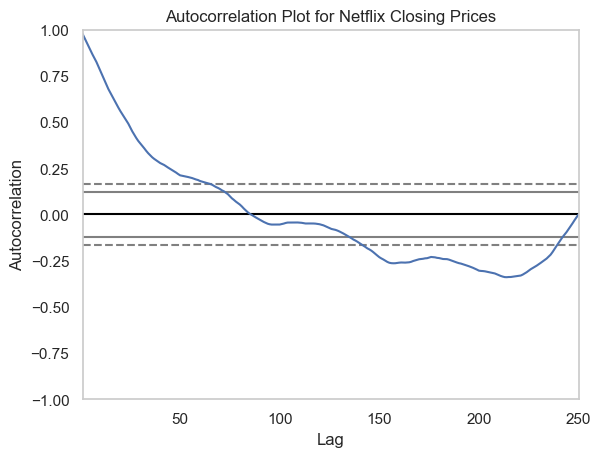

"\nThis autocorrelation plot reveals that Netflix's closing prices exhibit short-term momentum or trends, \nwith strong correlations at lower lags that decay gradually over time. However, long-term correlations are \nweak, and there is no evidence of strong seasonality or long-term predictability in the price series.\n"

In [38]:
# Use the 'Close' column for the autocorrelation plot

if 'Close' in nflx.columns:
    autocorrelation_plot(nflx['Close'])
    plt.title("Autocorrelation Plot for Netflix Closing Prices")
    plt.show()
else:
    print("The 'Close' column is not available in the Netflix DataFrame.")


'''
This autocorrelation plot reveals that Netflix's closing prices exhibit short-term momentum or trends, 
with strong correlations at lower lags that decay gradually over time. However, long-term correlations are 
weak, and there is no evidence of strong seasonality or long-term predictability in the price series.
'''

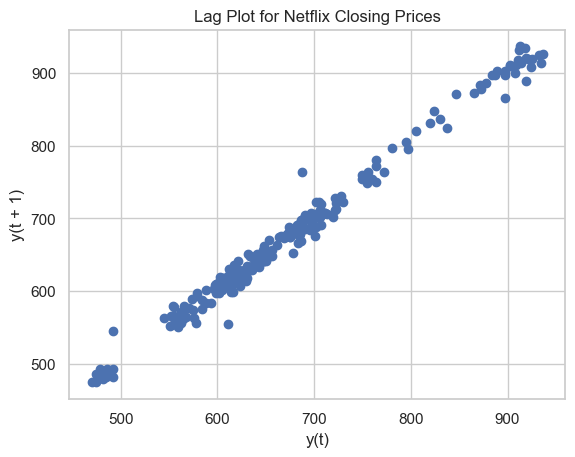

In [39]:
# Lag plot for Netflix stock
data_to_plot = nflx['Close'] if 'Close' in nflx.columns else None
if data_to_plot is not None:
    lag_plot(data_to_plot)
    plt.title("Lag Plot for Netflix Closing Prices")
    plt.show()
else:
    print("The 'Close' column is not available for Netflix data.")

    '''
    This lag plot demonstrates a strong positive linear relationship between consecutive 
    closing prices of Netflix. It indicates that the stock exhibits significant short-term dependence (momentum) with 
    low randomness, making it potentially predictable over short time horizons.
    A lag plot like this suggests that simple forecasting models (e.g., autoregressive models like AR or ARIMA) 
    could work well for predicting short-term movements in Netflix's stock price.'''

c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                ARIMA(10, 1, 5)   Log Likelihood                -971.943
Date:                Sat, 18 Jan 2025   AIC                           1975.886
Time:                        17:11:31   BIC                           2032.165
Sample:                             0   HQIC                          1998.539
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4978      0.617     -0.807      0.420      -1.707       0.711
ar.L2          0.0636      0.340      0.187      0.851      -0.602       0.729
ar.L3         -0.1912      0.292     -0.655      0.5

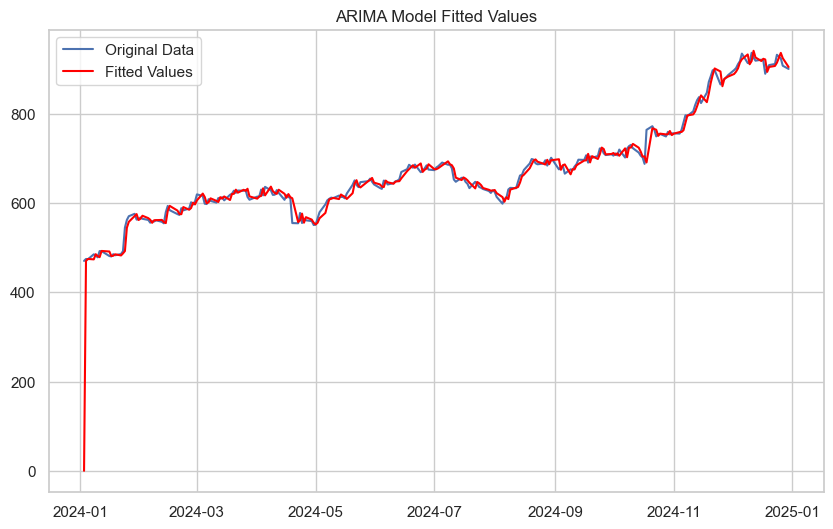

In [40]:
# Prepare the Netflix data for ARIMA modeling
if 'Close' in nflx.columns:
    nflx_close = nflx['Close'].dropna()  # Ensure no missing values
else:
    raise KeyError("The 'Close' column is not available in the Netflix data.")

# Define ARIMA parameters
ar_order = 10  # Autoregressive term
i_order = 1    # Differencing term
ma_order = 5   # Moving average term

# Fit the ARIMA model
arima_model = ARIMA(nflx_close, order=(ar_order, i_order, ma_order))
arima_result = arima_model.fit()

# Display the ARIMA model summary
print(arima_result.summary())

# Plot the fitted values
plt.figure(figsize=(10, 6))
plt.plot(nflx_close, label="Original Data")
plt.plot(arima_result.fittedvalues, label="Fitted Values", color="red")
plt.title("ARIMA Model Fitted Values")
plt.legend()
plt.show()


c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


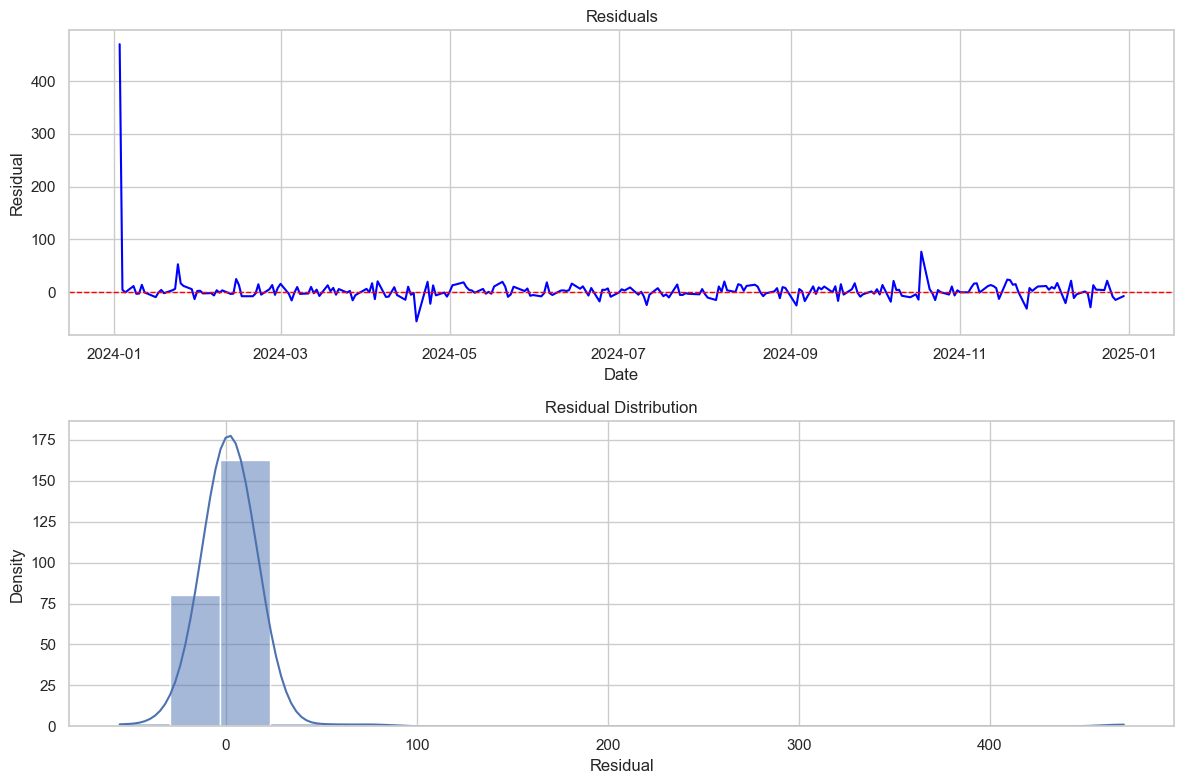

"These plots indicate that the ARIMA model captures the majority of the patterns in Netflix's \nclosing prices, as the residuals are centered around zero and appear random. However, some outliers \nand slight skewness in the residuals suggest there is room for refinement in the model."

In [41]:
def fit_arima_model(data, order):
    """
    Fits an ARIMA model to the given data.
    
    Parameters:
    data (Series): Time series data to fit the model.
    order (tuple): The (p, d, q) order of the ARIMA model.
    
    Returns:
    ARIMAResults: The fitted ARIMA model results.
    """
    model = ARIMA(data, order=order)
    return model.fit()

def plot_residuals(residuals):
    """
    Plots the residuals and residual distribution from a time series model.
    
    Parameters:
    residuals (Series): Residuals from the time series model.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    ax1.plot(residuals, color='blue')
    ax1.axhline(y=0, color='red', linestyle='--', linewidth=1)
    ax1.set_title('Residuals')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Residual')
    
    sns.histplot(residuals, kde=True, bins=20, ax=ax2)
    ax2.set_title('Residual Distribution')
    ax2.set_xlabel('Residual')
    ax2.set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

# Define ARIMA order
arima_order = (5, 1, 0)  # (p, d, q) order

# Fit ARIMA model and plot residuals
arima_results = fit_arima_model(nflx['Close'], order=arima_order)
plot_residuals(arima_results.resid)

'''These plots indicate that the ARIMA model captures the majority of the patterns in Netflix's 
closing prices, as the residuals are centered around zero and appear random. However, some outliers 
and slight skewness in the residuals suggest there is room for refinement in the model.'''

In [42]:
# Perform linear regression analysis for Netflix - Volume and Close
if 'Close' in nflx.columns and 'Volume' in nflx.columns:
    X = sm.add_constant(nflx['Volume'])  # Independent variable (add constant for intercept)
    Y = nflx['Close']  # Dependent variable
    lm = OLS(Y, X).fit()
    print(lm.summary())
else:
    print("Regression analysis requires both 'Close' and 'Volume' columns in the Netflix data.")


'''Relationship Between Volume and Price:

Although the relationship is statistically significant, it is extremely weak (low R-squared and tiny coefficient).
Trading volume is not a strong predictor of Netflix's closing price.
Model Limitations:

The residuals are not normally distributed and show positive autocorrelation, violating key assumptions of OLS regression.
The high condition number suggests potential multicollinearity or scaling issues.
Practical Implications:

While volume may play a role in determining price, its effect is likely overshadowed by 
other variables (e.g., market conditions, earnings reports, etc.).
More complex models (e.g., time-series models or multivariate regressions with additional predictors) 
may better capture the dynamics of Netflix's stock price.


R-squared = 0.053:
This indicates that only 5.3% of the variability in the closing price is explained by the volume. This is a very
low value, suggesting a weak relationship between the two variables.

Residual Diagnostics
Omnibus Test, Jarque-Bera (JB) Test, and Probabilities:

These tests assess whether the residuals follow a normal distribution.
The p-value for the Omnibus test is very small (<0.001), indicating that the residuals are not 
normally distributed. This violates one of the assumptions of OLS regression.
Skew = 0.867:

Indicates that the residuals are positively skewed, with a longer tail on the right.
Kurtosis = 3.311:

Suggests a slightly higher peak than a normal distribution, though it is close to 3 
(the kurtosis of a normal distribution).'''

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.92
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           0.000237
Time:                        17:11:31   Log-Likelihood:                -1520.3
No. Observations:                 250   AIC:                             3045.
Df Residuals:                     248   BIC:                             3052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        707.7578     11.833     59.812      0.0

"Relationship Between Volume and Price:\n\nAlthough the relationship is statistically significant, it is extremely weak (low R-squared and tiny coefficient).\nTrading volume is not a strong predictor of Netflix's closing price.\nModel Limitations:\n\nThe residuals are not normally distributed and show positive autocorrelation, violating key assumptions of OLS regression.\nThe high condition number suggests potential multicollinearity or scaling issues.\nPractical Implications:\n\nWhile volume may play a role in determining price, its effect is likely overshadowed by \nother variables (e.g., market conditions, earnings reports, etc.).\nMore complex models (e.g., time-series models or multivariate regressions with additional predictors) \nmay better capture the dynamics of Netflix's stock price.\n\n\nR-squared = 0.053:\nThis indicates that only 5.3% of the variability in the closing price is explained by the volume. This is a very\nlow value, suggesting a weak relationship between the tw